# Beginning

Imports

In [2]:
import numpy as np
from skimage.transform import radon, iradon, resize
import matplotlib.pyplot as plt
import scipy.ndimage as ndi

In [3]:
from skimage.data import shepp_logan_phantom

# New phantom

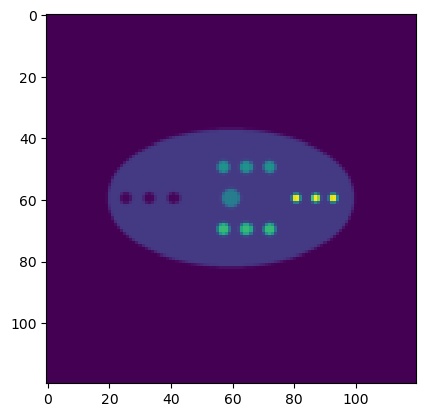

In [6]:
i0 = np.zeros((480,480))
xv = np.linspace(-119.5,119.5,480)
xv = np.expand_dims(xv,axis=-1)
yv = np.transpose(xv)
i0[((xv*1.8)**2+(yv)**2)<(80)**2]=1
iA = i0.copy()
i0[((xv-20)**2+(yv-25)**2)<(4)**2]=4
i0[((xv-20)**2+(yv-10)**2)<(4)**2]=4
i0[((xv-20)**2+(yv+5)**2)<(4)**2]=4
i0[((xv-0)**2+(yv-0)**2)<(6)**2]=2.5
i0[((xv+20)**2+(yv-25)**2)<(4)**2]=3
i0[((xv+20)**2+(yv-10)**2)<(4)**2]=3
i0[((xv+20)**2+(yv+5)**2)<(4)**2]=3
i0[((xv+0)**2+(yv-55)**2)<(2.8)**2]=6
i0[((xv+0)**2+(yv-66)**2)<(2.8)**2]=6
i0[((xv+0)**2+(yv-42)**2)<(2.8)**2]=6
i0[((xv+0)**2+(yv+53)**2)<(3.9)**2]=.1
i0[((xv+0)**2+(yv+68)**2)<(3.9)**2]=.1
i0[((xv+0)**2+(yv+37)**2)<(3.9)**2]=.1
# i0[((xv*1.8)**2+(yv)**2)<(80)**2]=1
# i0[((xv*1.8)**2+(yv)**2)<(80)**2]=1
i0 = resize(i0,(120,120))
iA = resize(0.096*iA,(120,120))

plt.imshow(i0)
# 


## Create sinogram: attenuation, sens, randoms

In [9]:
# Attenuation
theta = np.linspace(0,180,300,endpoint=False)
sinA = radon(iA,theta=theta)
sinA = np.exp(-sinA*.3)
#sinA = np.tile(theta,4)
#sinT = radon(i0)*sinA

# Class-recon

In [11]:
from myReconstructor import myReconstructor

In [13]:
sinA.shape

(120, 300)

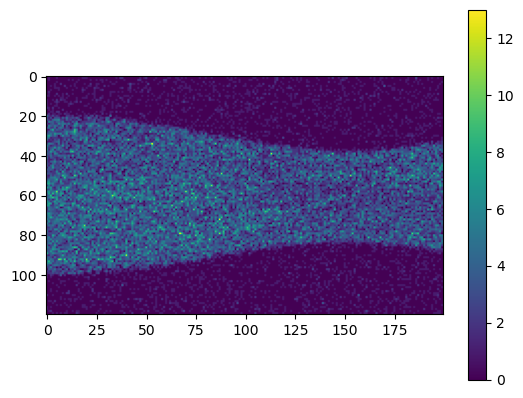

In [37]:
plt.imshow(myR.sinM[:,:200])
plt.colorbar()

In [16]:
myR = myReconstructor(i0,sinA,.25,1,nTheta=300)

In [19]:
myR.thetaV = np.tile(myR.thetaV,4)
myR.sinA = np.tile(myR.sinA,4)

In [22]:
myR.sinM = 0.25*(myR.fwdP__(i0)*myR.sinA+1)

In [1]:
plt.imshow(myR.sinM)

NameError: name 'plt' is not defined

In [27]:
rng = np.random.default_rng(seed=42)
myR.sinM = rng.poisson(myR.sinM)

In [29]:
myR.MLEM_init()
myR.makeKappa()
myR.makePrec()

C:\Users\User\anaconda3\Lib\site-packages\skimage\transform\radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


In [41]:
myR.PGDloop(beta=1e-2/4,nIt=400,inSmSigma=0,itSS=False,PL=False,recVect=True,Conj=False,truncSDIR=True,eps=.2,Neg=True,negCap=1)

In [49]:
myR.sinM.shape

(120, 1200)

In [45]:
iRef = myR.currRec.copy()
recV = myR.recVect.copy()
iRef = np.expand_dims(iRef,axis=-1)
convSp= np.sum(np.sum((recV-iRef)**2,axis=1),axis=0)

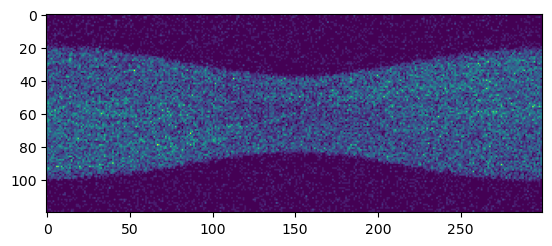

In [57]:
plt.imshow(myR.sinM.reshape((120,4,300))[:,0,:])

In [99]:
noiseV = [1]#[1,2,4] #,16,32]
capV = [1] #[.05,.1,.2,.33,.66,1,1.5]
iNegCap = np.zeros((120,120,len(capV)))
convSp = np.zeros((len(capV),400))
for nIdx,cap in enumerate(capV):
    #print(f'noise Level is {noise:.2f}')
    print(f'idx is {nIdx:d}')
    myR = myReconstructor(i0,sinA,.25,1,nTheta=300)
    myR.MLEM_init()
    myR.makeKappa()
    myR.makePrec()
#    myR.PGDloop(beta=2e-2,nIt=10,inSmSigma=0,itSS=False,PL=False,recVect=False,Conj=True,truncSDIR=True,eps=.2,Neg=True,negCap=cap)
#    myR.PGDloop(beta=2e-2,nIt=10,inSmSigma=0,itSS=False,PL=False,recVect=False,Conj=True,truncSDIR=True,eps=.2,Neg=True,negCap=cap)
#    myR.PGDloop(beta=2e-2,nIt=10,inSmSigma=0,itSS=False,PL=False,recVect=False,Conj=True,truncSDIR=True,eps=.2,Neg=True,negCap=cap)
    myR.PGDloop(beta=1e-2/4,nIt=400,inSmSigma=0,itSS=False,PL=False,recVect=True,Conj=False,truncSDIR=True,eps=.2,Neg=True,negCap=cap)
    iRef = myR.currRec.copy()
    recV = myR.recVect.copy()
    iRef = np.expand_dims(iRef,axis=-1)
    convSp[nIdx,:]= np.sum(np.sum((recV-iRef)**2,axis=1),axis=0)
    
    # myR.PGDloop(beta=1.e-2,nIt=100,Conj=False)
    # myR.PGDloop(beta=1.e-2,nIt=1000,Conj=False)
 #   myR.PGDloop(beta=3e-2,nIt=1000,Conj=False)
    iNegCap[:,:,nIdx]= myR.currRec.copy()

idx is 0


In [59]:
theta = np.linspace(0,180,300,endpoint=False)
sinA = radon(iA,theta=theta)
sinA = np.exp(-sinA*.3)

In [61]:
myR300 = myReconstructor(i0,sinA,1,1,nTheta=300)

In [67]:
sinB = myR.sinM.reshape((120,4,300))
myR300.sinM = np.sum(sinB,axis=1)

In [71]:
myR300.MLEM_init()
myR300.makeKappa()
myR300.makePrec()
myR300.PGDloop(beta=1e-2,nIt=400,inSmSigma=0,itSS=False,PL=False,recVect=True,Conj=False,truncSDIR=True,eps=.2,Neg=True,negCap=1)
iRef300 = myR300.currRec.copy()
recV300 = myR300.recVect.copy()
iRef300 = np.expand_dims(iRef300,axis=-1)
convSp300 = np.sum(np.sum((recV300-iRef300)**2,axis=1),axis=0)


In [66]:
myR300.MLEM_init()
myR.MLEM_init()

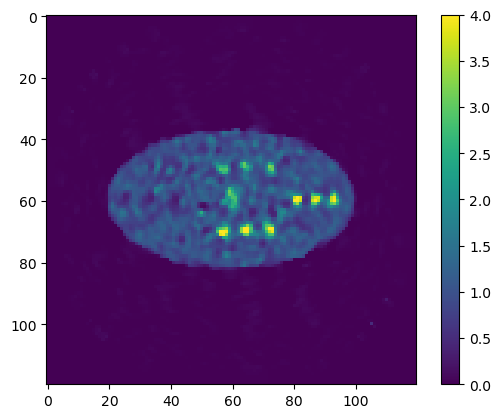

In [89]:
plt.imshow(iRef,vmax=4,vmin=0)
plt.colorbar()

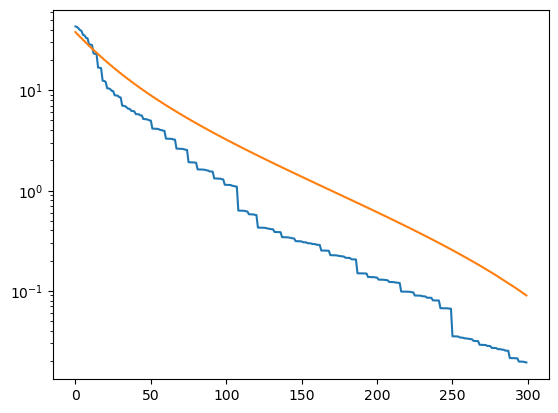

In [81]:
plt.plot(convSp[:-100])
plt.plot(convSp300[:-100])
plt.yscale('log')

In [163]:
myR_pos = myReconstructor(i0,sinA,1,1.0,nTheta=300)
myR_pos.MLEM_init()
myR_pos.makeKappa()
myR_pos.makePrec()
myR_pos.PGDloop(beta=1e-2,nIt=800,inSmSigma=0,itSS=False,PL=False,recVect=True,Conj=False,truncSDIR=True,eps=.2,Neg=False,negCap=0)
iRef = myR_pos.currRec.copy()
recV = myR_pos.recVect.copy()

C:\Users\User\anaconda3\Lib\site-packages\skimage\transform\radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


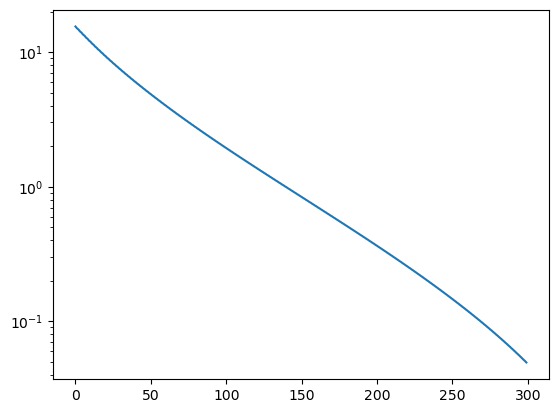

In [44]:
convSp.shape
plt.plot(convSp[0,:-100])
plt.yscale('log')

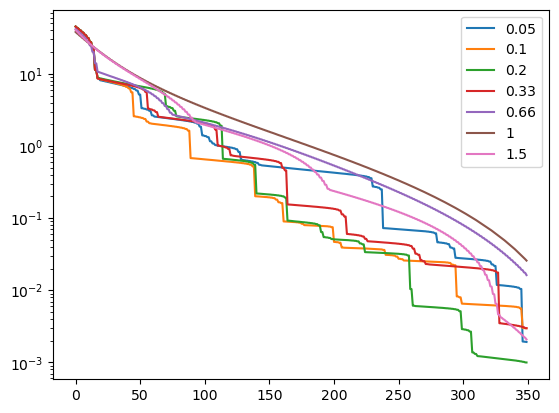

In [24]:
plt.plot(convSp[:,:-50].T)
plt.yscale('log')
#plt.xscale('log')
#plt.ylim(1e-2,None)
plt.legend(capV)

In [26]:
myR.MLEM_init()
#myR.makePrec()
#    myR.PGDloop(beta=2e-2,nIt=10,inSmSigma=0,itSS=False,PL=False,recVect=False,Conj=True,truncSDIR=True,eps=.2,Neg=True,negCap=cap)
#    myR.PGDloop(beta=2e-2,nIt=10,inSmSigma=0,itSS=False,PL=False,recVect=False,Conj=True,truncSDIR=True,eps=.2,Neg=True,negCap=cap)
#    myR.PGDloop(beta=2e-2,nIt=10,inSmSigma=0,itSS=False,PL=False,recVect=False,Conj=True,truncSDIR=True,eps=.2,Neg=True,negCap=cap)
myR.PGDloop(beta=1e-2,nIt=50,inSmSigma=0,itSS=False,PL=False,recVect=True,Conj=True,truncSDIR=True,eps=.2,Neg=True,negCap=1)
iRef = iNegCap[:,:,-2].copy()
# recV = myR.recVect.copy()
iRef = np.expand_dims(iRef,axis=-1)
convSp2= np.sum(np.sum((myR.recVect-iRef)**2,axis=1),axis=0)

betaCG 0.67 beta0 0.67
betaCG 0.82 beta0 0.82
betaCG 1.10 beta0 1.11
betaCG 0.44 beta0 0.45
betaCG 0.86 beta0 0.86
betaCG 0.64 beta0 0.64
betaCG 1.00 beta0 1.01
betaCG 0.46 beta0 0.45
betaCG 1.34 beta0 1.32
betaCG 0.56 beta0 0.56
betaCG 0.77 beta0 0.75
betaCG 1.39 beta0 1.37
betaCG 0.55 beta0 0.52
betaCG 1.41 beta0 1.39
betaCG 0.70 beta0 0.66
betaCG 0.94 beta0 0.93
betaCG 1.30 beta0 1.27
betaCG 0.60 beta0 0.58
betaCG 1.52 beta0 1.48
betaCG 0.72 beta0 0.69
betaCG 1.42 beta0 1.39
betaCG 0.56 beta0 0.54
betaCG 2.00 beta0 1.97
betaCG 0.44 beta0 0.41
betaCG 1.98 beta0 1.96
betaCG 0.57 beta0 0.55
betaCG 1.33 beta0 1.29
betaCG 1.08 beta0 1.06
betaCG 0.55 beta0 0.53
betaCG 1.73 beta0 1.71
betaCG 0.78 beta0 0.75
betaCG 0.88 beta0 0.86
betaCG 1.37 beta0 1.35
betaCG 0.69 beta0 0.66
betaCG 1.27 beta0 1.23
betaCG 0.80 beta0 0.78
betaCG 0.98 beta0 0.96
betaCG 1.48 beta0 1.46
betaCG 0.62 beta0 0.60
betaCG 0.94 beta0 0.92
betaCG 1.43 beta0 1.41
betaCG 0.86 beta0 0.84
betaCG 1.11 beta0 1.09
betaCG 1.06

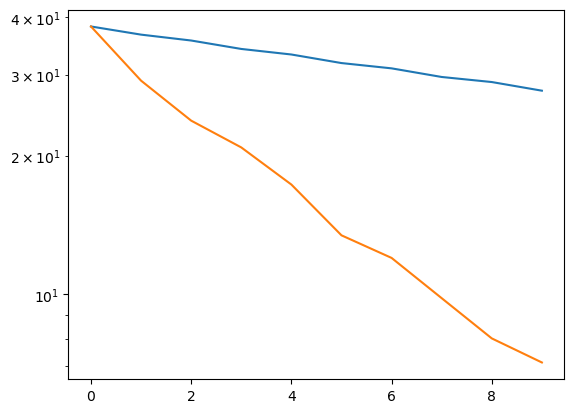

In [27]:
plt.plot(convSp[-2,:10].T)
plt.plot(convSp2[:10])
plt.yscale('log')
#plt.xscale('log')
#plt.ylim(1e-2,None)
#plt.legend(capV)

In [74]:
myR_n8 = myReconstructor(i0,sinA,8,1.0,nTheta=300)
myR_n8.MLEM_init()
myR_n8.makeKappa()
myR_n8.makePrec()
myR_n8.PGDloop(beta=1e-2,nIt=800,inSmSigma=0,itSS=False,PL=False,recVect=True,Conj=False,truncSDIR=True,eps=.2,Neg=True,negCap=cap)
iRef = myR_n8.currRec.copy()
recV = myR_n8.recVect.copy()
iRef = np.expand_dims(iRef,axis=-1)
convSp_n8= np.sum(np.sum((recV-iRef)**2,axis=1),axis=0)

C:\Users\User\anaconda3\Lib\site-packages\skimage\transform\radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


In [75]:
myR_n8.MLEM_init()
myR_n8.PGDloop(beta=1e-2,nIt=50,inSmSigma=0,itSS=False,PL=False,recVect=True,Conj=True,truncSDIR=True,eps=.2,Neg=True,negCap=cap)
recV = myR_n8.recVect.copy()
convSp_n8conj= np.sum(np.sum((recV-iRef)**2,axis=1),axis=0)

betaCG 0.30 beta0 0.30
betaCG 1.52 beta0 1.52
betaCG 0.79 beta0 0.79
betaCG 0.98 beta0 0.98
betaCG 0.93 beta0 0.93
betaCG 0.67 beta0 0.67
betaCG 1.16 beta0 1.16
betaCG 0.58 beta0 0.58
betaCG 0.67 beta0 0.67
betaCG 1.32 beta0 1.32
betaCG 0.96 beta0 0.96
betaCG 0.75 beta0 0.75
betaCG 0.62 beta0 0.62
betaCG 1.43 beta0 1.43
betaCG 0.52 beta0 0.53
betaCG 1.39 beta0 1.40
betaCG 0.66 beta0 0.67
betaCG 1.22 beta0 1.22
betaCG 0.65 beta0 0.65
betaCG 0.65 beta0 0.65
betaCG 1.33 beta0 1.33
betaCG 1.13 beta0 1.13
betaCG 0.51 beta0 0.52
betaCG 1.30 beta0 1.31
betaCG 0.75 beta0 0.75
betaCG 1.31 beta0 1.31
betaCG 0.51 beta0 0.51
betaCG 1.44 beta0 1.45
betaCG 0.64 beta0 0.65
betaCG 1.28 beta0 1.29
betaCG 0.66 beta0 0.67
betaCG 1.58 beta0 1.59
betaCG 0.50 beta0 0.50
betaCG 0.84 beta0 0.85
betaCG 1.32 beta0 1.33
betaCG 0.88 beta0 0.88
betaCG 0.96 beta0 0.96
betaCG 1.00 beta0 1.01
betaCG 0.88 beta0 0.89
betaCG 0.82 beta0 0.82
betaCG 0.62 beta0 0.62
betaCG 1.53 beta0 1.54
betaCG 0.96 beta0 0.96
betaCG 0.74

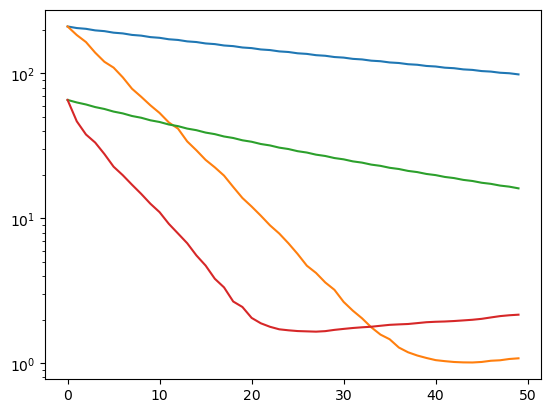

In [84]:
plt.plot(convSp_n8[:50])
plt.plot(convSp_n8conj)
plt.plot(convSp[-2,:50].T)
plt.plot(convSp2[:50])
plt.yscale('log')

In [30]:
myR_n01 = myReconstructor(i0,sinA,0.3,1.0,nTheta=300)
myR_n01.MLEM_init()
myR_n01.makeKappa()
myR_n01.makePrec()
myR_n01.PGDloop(beta=1e-2,nIt=800,inSmSigma=0,itSS=False,PL=False,recVect=True,Conj=False,truncSDIR=True,eps=.2,Neg=True,negCap=cap)
iRef = myR_n01.currRec.copy()
recV = myR_n01.recVect.copy()
iRef = np.expand_dims(iRef,axis=-1)
convSp_n01= np.sum(np.sum((recV-iRef)**2,axis=1),axis=0)
myR_n01.MLEM_init()
myR_n01.PGDloop(beta=1e-2,nIt=50,inSmSigma=0,itSS=False,PL=False,recVect=True,Conj=True,truncSDIR=True,eps=.2,Neg=True,negCap=cap)
recV = myR_n01.recVect.copy()
convSp_n01conj= np.sum(np.sum((recV-iRef)**2,axis=1),axis=0)

betaCG 0.82 beta0 0.82
betaCG 0.71 beta0 0.59


D:\PET\PETRIC_code\PETRIC-Tomo-Unimib\myReconstructor.py:208: RuntimeWarning: invalid value encountered in log
  minLL = np.sum(-fwdProj+self.sinM*np.log(fwdProj))


betaCG 0.56 beta0 0.54
betaCG 0.55 beta0 0.55
betaCG 0.92 beta0 0.92
betaCG 0.43 beta0 0.42
betaCG 0.88 beta0 0.88
betaCG 0.60 beta0 0.59
betaCG 0.99 beta0 0.98
betaCG 0.82 beta0 0.81
betaCG 0.83 beta0 0.82
betaCG 0.87 beta0 0.86
betaCG 0.86 beta0 0.84
betaCG 0.96 beta0 0.95
betaCG 0.81 beta0 0.81
betaCG 0.72 beta0 0.72
betaCG 1.12 beta0 1.13
betaCG 0.61 beta0 0.61
betaCG 1.21 beta0 1.20
betaCG 0.60 beta0 0.59
betaCG 1.12 beta0 1.13
betaCG 0.63 beta0 0.63
betaCG 0.99 beta0 0.98
betaCG 0.85 beta0 0.84
betaCG 0.94 beta0 0.93
betaCG 0.57 beta0 0.57
betaCG 1.56 beta0 1.56
betaCG 0.55 beta0 0.54
betaCG 1.12 beta0 1.12
betaCG 0.76 beta0 0.76
betaCG 0.93 beta0 0.92
betaCG 0.88 beta0 0.87
betaCG 0.66 beta0 0.66
betaCG 1.19 beta0 1.18
betaCG 0.58 beta0 0.57
betaCG 1.29 beta0 1.28
betaCG 0.61 beta0 0.60
betaCG 1.11 beta0 1.10
betaCG 0.71 beta0 0.70
betaCG 1.14 beta0 1.13
betaCG 0.62 beta0 0.62
betaCG 0.98 beta0 0.97
betaCG 0.96 beta0 0.96
betaCG 0.71 beta0 0.70
betaCG 0.97 beta0 0.96
betaCG 0.99

In [58]:
myR_n01b = myReconstructor(i0,sinA,0.3,1.0,nTheta=300)
myR_n01b.MLEM_init()
myR_n01b.makeKappa()
myR_n01b.makePrec()
myR_n01b.PGDloop(beta=1e-3,nIt=800,inSmSigma=0,itSS=False,PL=False,recVect=True,Conj=False,truncSDIR=True,eps=.2,Neg=True,negCap=cap)
iRef = myR_n01b.currRec.copy()
recV = myR_n01b.recVect.copy()
iRef = np.expand_dims(iRef,axis=-1)
convSp_n01b= np.sum(np.sum((recV-iRef)**2,axis=1),axis=0)
myR_n01b.MLEM_init()
myR_n01b.PGDloop(beta=1e-3,nIt=50,inSmSigma=0,itSS=False,PL=False,recVect=True,Conj=True,truncSDIR=True,eps=.2,Neg=True,negCap=cap)
recV = myR_n01.recVect.copy()
convSp_n01bconj= np.sum(np.sum((recV-iRef)**2,axis=1),axis=0)

C:\Users\User\anaconda3\Lib\site-packages\skimage\transform\radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '
D:\PET\PETRIC_code\PETRIC-Tomo-Unimib\myReconstructor.py:208: RuntimeWarning: invalid value encountered in log
  minLL = np.sum(-fwdProj+self.sinM*np.log(fwdProj))


betaCG 0.58 beta0 0.59
betaCG 1.42 beta0 1.41
betaCG 0.70 beta0 0.71
betaCG 0.86 beta0 0.86
betaCG 1.08 beta0 1.09
betaCG 0.64 beta0 0.66
betaCG 0.92 beta0 0.91
betaCG 1.18 beta0 1.18
betaCG 0.76 beta0 0.75
betaCG 0.76 beta0 0.76
betaCG 0.85 beta0 0.86
betaCG 1.89 beta0 1.87
betaCG 0.39 beta0 0.38
betaCG 1.49 beta0 1.49
betaCG 0.79 beta0 0.77
betaCG 1.18 beta0 1.17
betaCG 0.79 beta0 0.78
betaCG 1.05 beta0 1.03
betaCG 0.78 beta0 0.75
betaCG 1.27 beta0 1.26
betaCG 0.75 beta0 0.75
betaCG 0.94 beta0 0.92
betaCG 1.18 beta0 1.16
betaCG 1.11 beta0 1.11
betaCG 0.59 beta0 0.57
betaCG 1.83 beta0 1.82
betaCG 0.65 beta0 0.64
betaCG 0.85 beta0 0.83
betaCG 1.93 beta0 1.90
betaCG 0.47 beta0 0.45
betaCG 2.03 beta0 2.00
betaCG 0.49 beta0 0.47
betaCG 2.03 beta0 2.02
betaCG 0.51 beta0 0.49
betaCG 1.83 beta0 1.81
betaCG 0.72 beta0 0.69
betaCG 1.15 beta0 1.12
betaCG 1.02 beta0 0.99
betaCG 1.00 beta0 0.97
betaCG 1.12 beta0 1.11
betaCG 0.87 beta0 0.85
betaCG 1.22 beta0 1.20
betaCG 0.81 beta0 0.78
betaCG 1.15

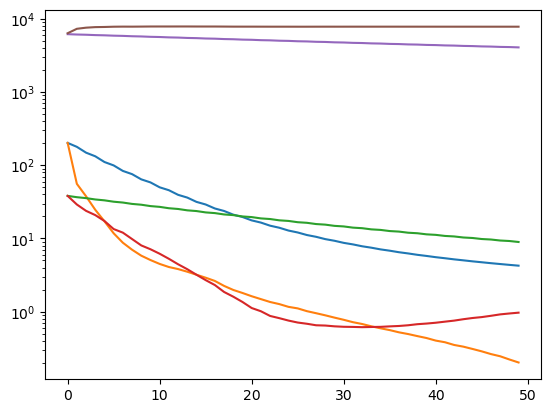

In [62]:
plt.plot(convSp_n01[:50])
plt.plot(convSp_n01conj)
plt.plot(convSp[-2,:50].T)
plt.plot(convSp2[:50])
plt.plot(convSp_n01b[:50])
plt.plot(convSp_n01bconj)
plt.yscale('log')

In [126]:
myR_r2 = myReconstructor(i0,sinA,1,2.0,nTheta=300)
myR_r2.MLEM_init()
myR_r2.makeKappa()
myR_r2.makePrec()
myR_r2.PGDloop(beta=1e-2,nIt=800,inSmSigma=0,itSS=False,PL=False,recVect=True,Conj=False,truncSDIR=True,eps=.2,Neg=True,negCap=cap)
iRef = myR_r2.currRec.copy()
recV = myR_r2.recVect.copy()
iRef = np.expand_dims(iRef,axis=-1)
convSp_r2b= np.sum(np.sum((recV-iRef)**2,axis=1),axis=0)
myR_r2.MLEM_init()
myR_r2.PGDloop(beta=1e-2,nIt=50,inSmSigma=0,itSS=False,PL=False,recVect=True,Conj=True,truncSDIR=True,eps=.2,Neg=True,negCap=cap)
recV = myR_r2.recVect.copy()
convSp_r2bconj= np.sum(np.sum((recV-iRef)**2,axis=1),axis=0)

C:\Users\User\anaconda3\Lib\site-packages\skimage\transform\radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


betaCG 0.61 beta0 0.62
betaCG 1.42 beta0 1.43
betaCG 0.31 beta0 0.31
betaCG 0.65 beta0 0.65
betaCG 0.42 beta0 0.42
betaCG 1.00 beta0 1.00
betaCG 0.63 beta0 0.63
betaCG 0.83 beta0 0.83
betaCG 0.87 beta0 0.87
betaCG 0.81 beta0 0.82
betaCG 0.72 beta0 0.72
betaCG 0.70 beta0 0.71
betaCG 1.18 beta0 1.19
betaCG 0.70 beta0 0.70
betaCG 0.59 beta0 0.60
betaCG 1.37 beta0 1.38
betaCG 0.70 beta0 0.70
betaCG 0.57 beta0 0.57
betaCG 0.84 beta0 0.85
betaCG 0.97 beta0 0.97
betaCG 0.65 beta0 0.65
betaCG 1.32 beta0 1.32
betaCG 0.60 beta0 0.60
betaCG 0.88 beta0 0.88
betaCG 0.79 beta0 0.79
betaCG 0.73 beta0 0.73
betaCG 0.90 beta0 0.90
betaCG 0.80 beta0 0.80
betaCG 0.84 beta0 0.84
betaCG 0.61 beta0 0.61
betaCG 0.89 beta0 0.89
betaCG 1.10 beta0 1.11
betaCG 0.71 beta0 0.71
betaCG 1.09 beta0 1.09
betaCG 0.44 beta0 0.44
betaCG 1.34 beta0 1.34
betaCG 0.77 beta0 0.78
betaCG 0.93 beta0 0.93
betaCG 0.78 beta0 0.79
betaCG 0.76 beta0 0.77
betaCG 0.90 beta0 0.90
betaCG 0.60 beta0 0.60
betaCG 1.64 beta0 1.64
betaCG 0.63

In [141]:
myR_r2b = myReconstructor(i0,sinA,1,2.0,nTheta=300)
myR_r2b.MLEM_init()
myR_r2b.makeKappa()
myR_r2b.makePrec(inSmSigma=1)
myR_r2b.PGDloop(beta=1e-2,nIt=800,inSmSigma=1,itSS=False,PL=False,recVect=True,Conj=False,truncSDIR=True,eps=.2,Neg=True,negCap=cap)
iRef = myR_r2b.currRec.copy()
recV = myR_r2b.recVect.copy()
iRef = np.expand_dims(iRef,axis=-1)
convSp_r2c= np.sum(np.sum((recV-iRef)**2,axis=1),axis=0)
myR_r2b.MLEM_init()
myR_r2b.PGDloop(beta=1e-2,nIt=50,inSmSigma=1,itSS=False,PL=False,recVect=True,Conj=True,truncSDIR=True,eps=.2,Neg=True,negCap=cap)
recV = myR_r2b.recVect.copy()
convSp_r2cconj= np.sum(np.sum((recV-iRef)**2,axis=1),axis=0)

C:\Users\User\anaconda3\Lib\site-packages\skimage\transform\radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


betaCG 0.24 beta0 0.29
betaCG 0.55 beta0 0.55
betaCG 1.09 beta0 1.09
betaCG 0.56 beta0 0.57
betaCG 0.71 beta0 0.71
betaCG 0.58 beta0 0.59
betaCG 0.89 beta0 0.89
betaCG 0.36 beta0 0.36
betaCG 1.32 beta0 1.32
betaCG 0.46 beta0 0.46
betaCG 1.20 beta0 1.20
betaCG 0.52 beta0 0.52
betaCG 1.29 beta0 1.29
betaCG 0.69 beta0 0.69
betaCG 0.67 beta0 0.66
betaCG 1.19 beta0 1.19
betaCG 0.82 beta0 0.82
betaCG 0.55 beta0 0.55
betaCG 1.62 beta0 1.63
betaCG 0.40 beta0 0.40
betaCG 1.02 beta0 1.02
betaCG 1.03 beta0 1.03
betaCG 0.68 beta0 0.68
betaCG 0.89 beta0 0.89
betaCG 0.90 beta0 0.91
betaCG 0.68 beta0 0.68
betaCG 0.73 beta0 0.74
betaCG 1.24 beta0 1.24
betaCG 0.63 beta0 0.63
betaCG 1.08 beta0 1.08
betaCG 0.62 beta0 0.63
betaCG 1.01 beta0 1.01
betaCG 0.64 beta0 0.65
betaCG 1.14 beta0 1.15
betaCG 0.53 beta0 0.53
betaCG 0.97 beta0 0.97
betaCG 1.02 beta0 1.03
betaCG 0.94 beta0 0.95
betaCG 0.51 beta0 0.51
betaCG 0.89 beta0 0.89
betaCG 1.48 beta0 1.48
betaCG 0.44 beta0 0.45
betaCG 0.95 beta0 0.95
betaCG 1.19

In [153]:
recV = myR_r2b.recVect.copy()
convSp_r2cconj= np.sum(np.sum((recV-iRef)**2,axis=1),axis=0)

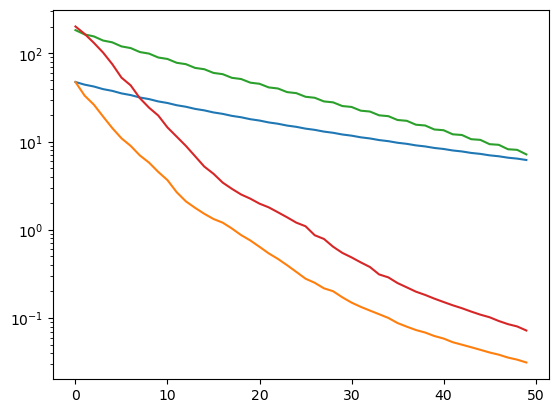

In [155]:
plt.plot(convSp_r2b[:50])
plt.plot(convSp_r2bconj)
plt.plot(convSp_r2c[:50])
plt.plot(convSp_r2cconj*1.1)
# plt.plot(convSp[-2,:50].T)
# plt.plot(convSp2[:50])
plt.yscale('log')

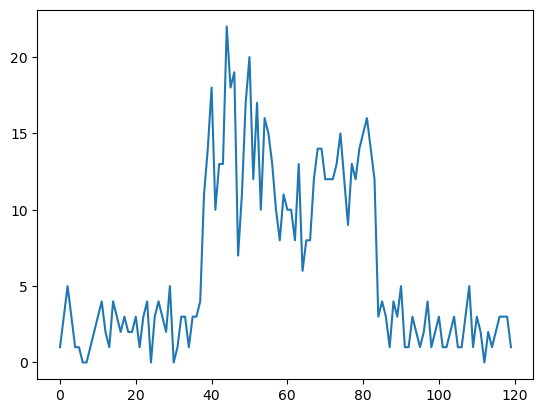

In [138]:
myR_P = myReconstructor(i0,sinA,1,2.0,nTheta=300)
myR_P.MLEM_init()
myR_P.makeKappa()
myR_r2b.makePrec(inSmSigma=1)
myR_r2b.PGDloop(beta=1e-2,nIt=800,inSmSigma=1,itSS=False,PL=False,recVect=True,Conj=False,truncSDIR=True,eps=.2,Neg=True,negCap=cap)
iRef = myR_r2b.currRec.copy()
recV = myR_r2b.recVect.copy()
iRef = np.expand_dims(iRef,axis=-1)
convSp_r2c= np.sum(np.sum((recV-iRef)**2,axis=1),axis=0)
myR_r2b.MLEM_init()
myR_r2b.PGDloop(beta=1e-2,nIt=50,inSmSigma=1,itSS=False,PL=False,recVect=True,Conj=True,truncSDIR=True,eps=.2,Neg=True,negCap=cap)
recV = myR_r2b.recVect.copy()
convSp_r2cconj= np.sum(np.sum((recV-iRef)**2,axis=1),axis=0)

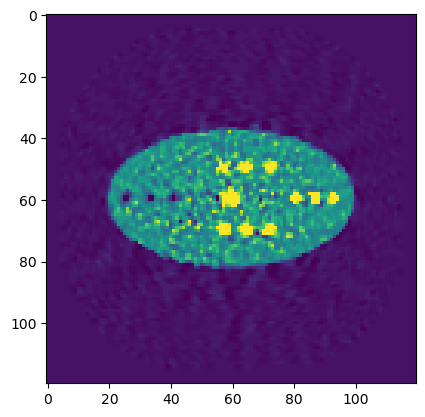

In [160]:
plt.imshow(myR_n8.currRec,vmax=2,vmin=-.1)

In [24]:
myR.PGDloop(beta=2e-2,nIt=500,inSmSigma=0,itSS=False,PL=False,recVect=True,Conj=False,truncSDIR=True,eps=.2,Neg=True,negCap=cap)

In [38]:
myR.PGDloop(beta=1e-2,nIt=500,inSmSigma=0,itSS=False,PL=False,recVect=True,Conj=False,truncSDIR=True,eps=.2,Neg=True,negCap=cap)

In [177]:
i1 = myR.currRec.copy()

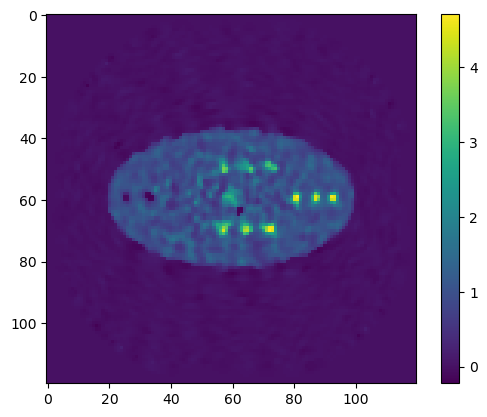

In [180]:
plt.imshow(myR.currRec) #,vmin=-.1,vmax=2)#( myR.recVect[:,:,-1]),vmin=-.1,vmax=4)
plt.colorbar()

In [50]:
tSin = myR.fwdP__(myR.currRec)

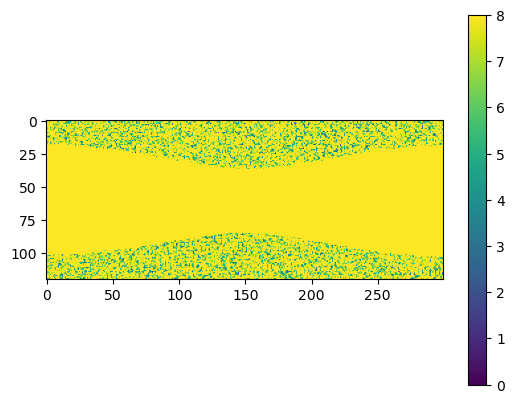

In [94]:
plt.imshow(myR_n8.sinM,vmax=8)
plt.colorbar()

$\frac{(x-y)(5x^2+6y^2-7xy+2\epsilon^2)}{(5x^2+5y^2-8xy+\epsilon^2)^{3/2}}$

$\frac{(x-y)(3x^2+4y^2-3xy+2\epsilon^2)}{(3x^2+3y^2-4xy+\epsilon^2)^{3/2}}$

$5x^2+5y^2-8xy=x^2+y^2+2(x)$

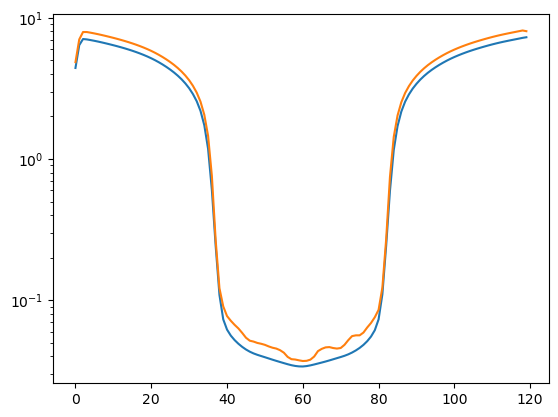

In [80]:
plt.plot(myR_n8.myPrecTomo[:,60])
# plt.plot(hess2[:,60])
plt.plot(myR_n8.currPrec[:,60])
#plt.plot(myR.currPrec[:,60])
plt.yscale('log')
#plt.colorbar()

In [266]:
fv.shape

(100, 1)

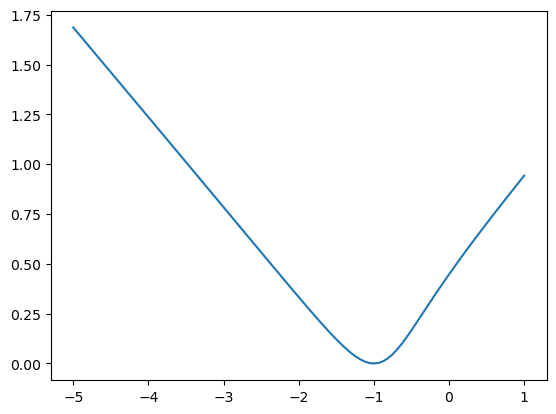

In [291]:
x = np.expand_dims(np.linspace(-5,1,100),axis=-1)
y =  -1 #x.copy().transpose()
fv = (x-y)**2/np.sqrt(x**2+y**2+4*(x-y)**2)
plt.plot(x[:],fv)
#plt.colorbar()

C:\Users\User\AppData\Local\Temp\ipykernel_6936\3654630587.py:4: RuntimeWarning: invalid value encountered in divide
  fv = (eps_**4 -eps_**2 * (-5*x**2+14*x*y-y**2)-y**2 * (7*x**2 + 7 * y**2 -22*x*y))/(5*x**2+5*y**2-8*x*y)**(5/2)


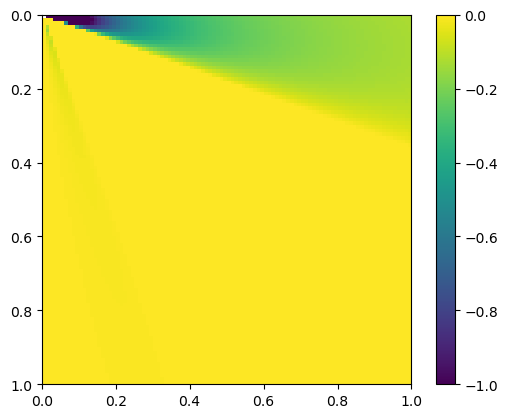

In [17]:
x = np.expand_dims(np.linspace(0,1,100),axis=-1)
y = x.copy().transpose()
eps_ = .0
fv = (eps_**4 -eps_**2 * (-5*x**2+14*x*y-y**2)-y**2 * (7*x**2 + 7 * y**2 -22*x*y))/(5*x**2+5*y**2-8*x*y)**(5/2)
#fv += (eps_**4 -eps_**2 * (-5*y**2+14*x*y-x**2)-x**2 * (7*x**2 + 7 * y**2 -22*x*y))/(5*x**2+5*y**2-8*x*y)**(5/2)
#fv += -x**2 * (7*x**2 + 7 * y**2 -22*x*y)/(5*x**2+5*y**2-8*x*y)**(5/2)
plt.imshow(fv,vmax=0,vmin=-1,extent=[0,1,1,0])
plt.colorbar()

In [69]:
[f'x={x:.2f}' for x in np.squeeze(yv)]

['x=0.00', 'x=0.10', 'x=0.30', 'x=0.50']

In [67]:
for x in np.squeeze(yv):
    print(x)

0.0
0.1
0.3
0.5


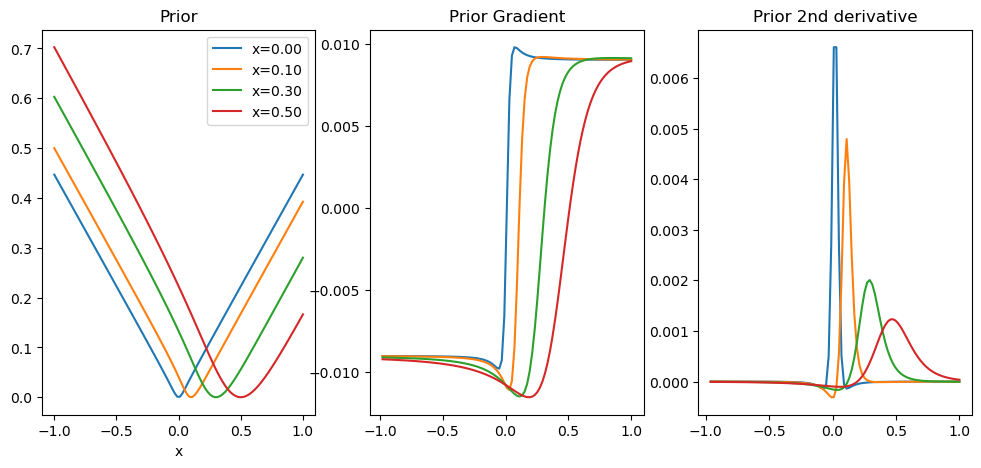

In [77]:
xv = np.expand_dims(np.linspace(-1,1,100),axis=-1)
yv = np.expand_dims(np.array([0,.1,.3,.5]),axis=-1).transpose()
pVal = (xv-yv)**2/np.sqrt(xv**2+yv**2+4*(xv-yv)**2+0.01)
plt.figure(figsize=(12,5))
plt.subplot(131)
plt.plot(np.squeeze(xv),pVal)
plt.xlabel('x')
plt.legend([f'x={x:.2f}' for x in np.squeeze(yv)])
plt.title('Prior')
plt.subplot(132)
plt.plot(np.squeeze(xv[1:]),np.diff(pVal,axis=0))
plt.title('Prior Gradient')
plt.subplot(133)
plt.plot(np.squeeze(xv[2:]),np.diff(np.diff(pVal,axis=0),axis=0))
_=plt.title('Prior 2nd derivative')
# pVal = yv
# plt.subplot(131)

# plt.plot(xv,(y0-xv)**2/(x)

1. capire TruncSDir
2. confrontare 2 step size
3. step size normal vs exp
4. prec hess vs exp

In [106]:
#plt.figure()
myR.PGDloop(beta=2e-2,nIt=1000,inSmSigma=0,itSS=False,PL=False,recVect=True,Conj=False,truncSDIR=True,eps=.2,Neg=False)
#myR.PGDloop(beta=2e-2,inSmSigma=1.0,nIt=400,PL=False,itSS=False,recVect=True,Conj=True,truncSDIR=True)
#plt.show()

num: 2.68e+00 denT: 1.43e+02 denP: 9.04e-02	initialSS = 1.88e-02


final ss: 1.88e-02
num: 3.29e+03 denT: 1.17e+05 denP: -2.12e-01	initialSS = 2.80e-02


final ss: 2.80e-02
num: 1.61e+03 denT: 6.75e+04 denP: 1.54e+00	initialSS = 2.38e-02


final ss: 2.38e-02
num: 9.57e+02 denT: 4.37e+04 denP: 2.17e+00	initialSS = 2.19e-02


final ss: 2.19e-02
num: 6.36e+02 denT: 3.05e+04 denP: 2.49e+00	initialSS = 2.09e-02


final ss: 2.09e-02
num: 4.53e+02 denT: 2.23e+04 denP: 2.69e+00	initialSS = 2.03e-02


final ss: 2.03e-02
num: 3.40e+02 denT: 1.70e+04 denP: 2.84e+00	initialSS = 2.00e-02


final ss: 2.00e-02
num: 2.66e+02 denT: 1.34e+04 denP: 2.95e+00	initialSS = 1.98e-02


final ss: 1.98e-02
num: 2.15e+02 denT: 1.09e+04 denP: 3.04e+00	initialSS = 1.98e-02


final ss: 1.98e-02
num: 1.79e+02 denT: 9.01e+03 denP: 3.11e+00	initialSS = 1.99e-02


final ss: 1.99e-02
num: 1.52e+02 denT: 7.62e+03 denP: 3.16e+00	initialSS = 2.00e-02


final ss: 2.00e-02
num: 1.32e+02 denT: 6.57e+03 denP: 3.21e+00	initialSS

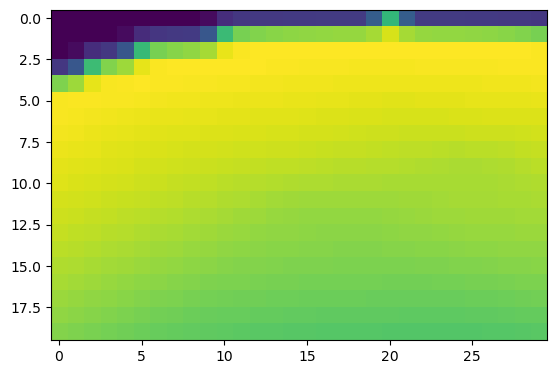

In [71]:
plt.imshow(myR.myPrecTomo[:20,40:70])

In [108]:
iPos_n2 = myR.currRec.copy()

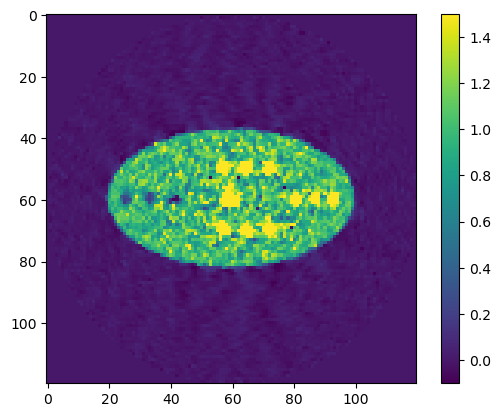

In [134]:
plt.imshow(iNegCap_n2[:,:,6],vmax=1.5,vmin=-.1)
plt.colorbar()

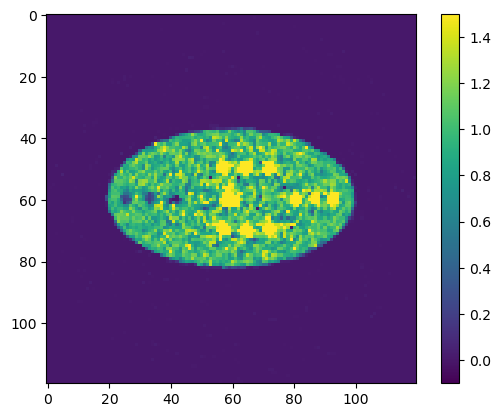

In [132]:
plt.imshow(iPos_n2[:,:],vmax=1.5,vmin=-0.1)
plt.colorbar()

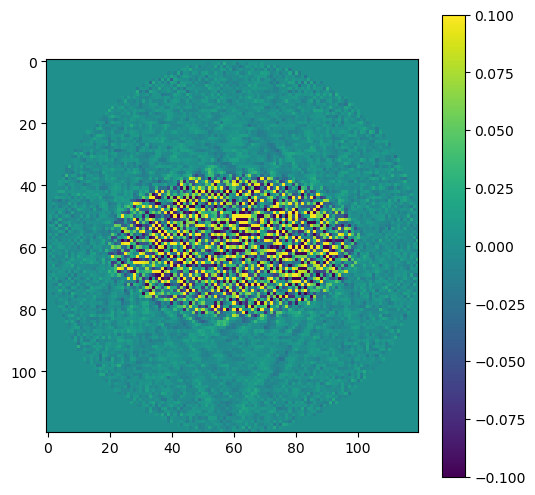

In [75]:
plt.figure(figsize=(6,6))
#plt.imshow(myR.currRec,vmax=.2,vmin=-.1) #,vmin=1050,vmax=1650)
plt.imshow(myR.currRec-myR1[:,:,-1],vmax=.1,vmin=-.1) #,vmin=1050,vmax=1650)
plt.colorbar()

In [224]:
sin = myR.fwdP__(iRef)*myR.sinA

In [120]:
iRefPos = myR.currRec.copy()

In [239]:
recV1 = myR.recVect.copy()

In [228]:
myR.randV

1.0

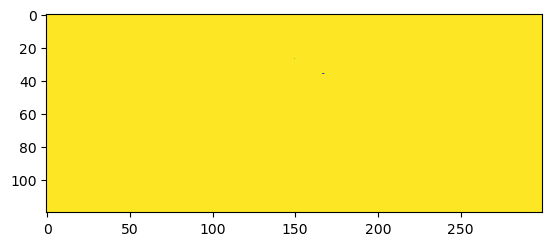

In [234]:
plt.imshow(sin+myR.randV,vmax=.3)
#plt.colorbar()

 Ad esempio se ho un bordo netto la mia ll continua a scendere perché sto mettendo a zero le LOR che diventano negative. Quando invece metto a zero i pixel è diverso perchè se ho il cercho

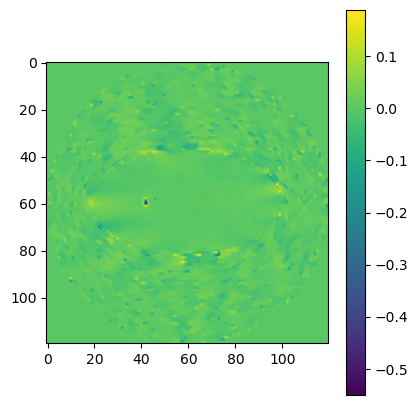

In [209]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(iRef-iRefPos) #,vmin=-.1,vmax=2) #-2*myR.recVect[:,:,-2]+myR.recVect[:,:,-3])
plt.colorbar()#,vmax=6)
# plt.subplot(122)
# plt.imshow(myR.recVect[:,:,-1]-myR.recVect[:,:,0])
#plt.colorbar()#,vmax=6)

In [77]:
myR.MLEM_init()
myR.makeKappa()
#myR.makePrec(inSmSigma=1)
myR.PGDloop(beta=2e-2,nIt=1000,Neg=True,inSmSigma=0,recVect=True,Conj=False,itSS=False,PL=False,truncSDIR=True)

num: 3.77e+00 denT: 1.35e+01 denP: 5.77e-01	initialSS = 2.68e-01


final ss: 2.68e-01
num: 6.14e+00 denT: 8.64e+01 denP: 1.30e+00	initialSS = 7.01e-02


final ss: 7.01e-02
num: 2.18e+00 denT: 1.88e+01 denP: 3.70e-01	initialSS = 1.14e-01


final ss: 1.14e-01
num: 2.80e+00 denT: 3.70e+01 denP: 3.98e-01	initialSS = 7.49e-02


final ss: 7.49e-02
num: 1.61e+00 denT: 1.35e+01 denP: 2.87e-01	initialSS = 1.17e-01


final ss: 1.17e-01
num: 2.28e+00 denT: 3.03e+01 denP: 3.90e-01	initialSS = 7.43e-02


final ss: 7.43e-02
num: 1.30e+00 denT: 1.07e+01 denP: 3.27e-01	initialSS = 1.18e-01


final ss: 1.18e-01
num: 1.87e+00 denT: 2.46e+01 denP: 3.72e-01	initialSS = 7.46e-02


final ss: 7.46e-02
num: 1.07e+00 denT: 8.82e+00 denP: 2.04e-01	initialSS = 1.19e-01


final ss: 1.19e-01
num: 1.57e+00 denT: 2.08e+01 denP: 4.55e-01	initialSS = 7.40e-02


final ss: 7.40e-02
num: 8.95e-01 denT: 7.24e+00 denP: 3.67e-01	initialSS = 1.18e-01


final ss: 1.18e-01
num: 1.30e+00 denT: 1.68e+01 denP: 4.09e-01	initialSS 

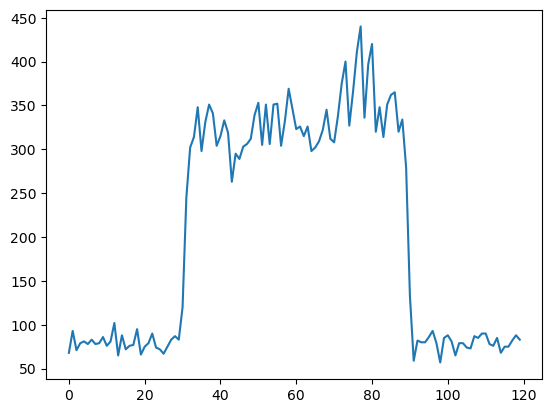

In [28]:
plt.plot(myR.sinM[:,90])
#plt.colorbar()

In [79]:
iRef =myR.currRec.copy()

In [289]:
np.save('iRef_neg.npy',iRef1)

In [24]:
iRef = np.load('iRef_neg.npy')

In [40]:
myR.currRec=iRef.copy()

NameError: name 'iRef' is not defined

In [95]:
myR1 = myR.recVect.copy()
cR = np.sum(np.sum(myR1-np.expand_dims(iRef,axis=-1),axis=1)**2,axis=0)

In [113]:
myR2 = myR.recVect.copy()
cR2 = np.sum(np.sum(myR2-np.expand_dims(iRef,axis=-1),axis=1)**2,axis=0)

In [123]:
myR3 = myR.recVect.copy()
cR3 = np.sum(np.sum(myR3-np.expand_dims(iRefPos,axis=-1),axis=1)**2,axis=0)

In [147]:
myR4 = myR.recVect.copy()
cR4 = np.sum(np.sum(myR4-np.expand_dims(iRefPos,axis=-1),axis=1)**2,axis=0)

In [164]:
myR5 = myR.recVect.copy()
cR5 = np.sum(np.sum(myR5-np.expand_dims(iRefPos,axis=-1),axis=1)**2,axis=0)

In [215]:
myR6 = myR.recVect.copy()
cR6 = np.sum(np.sum(myR6-np.expand_dims(iRefPos,axis=-1),axis=1)**2,axis=0)

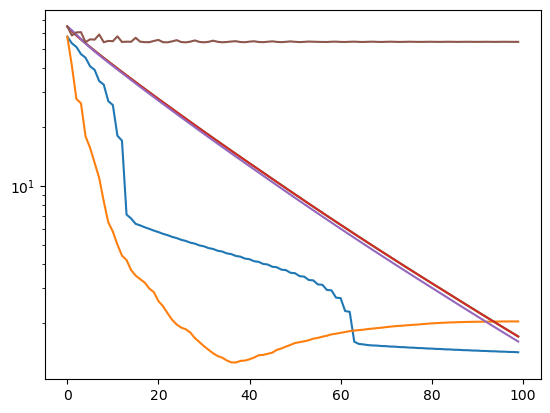

In [217]:
plt.plot(cR[:])
plt.plot(cR2[:])
plt.plot(cR3[:100])
plt.plot(cR4[:])
plt.plot(cR5[:])
plt.plot(cR6[:])
plt.yscale('log')

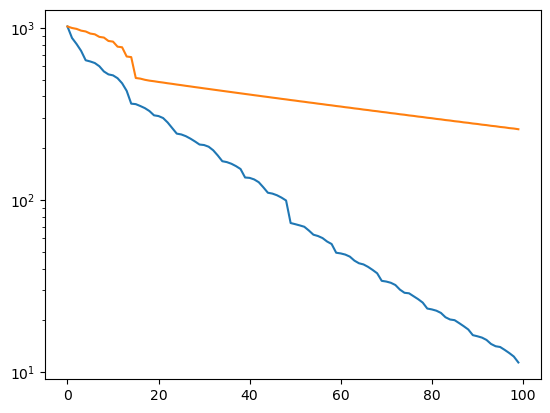

In [283]:
plt.plot(cR[:])
plt.plot(cR2[:])
# plt.plot(cR3[:10])
#plt.plot(cR4[:10])
plt.yscale('log')

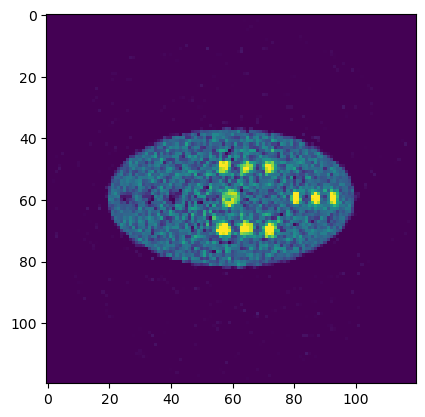

In [90]:
plt.imshow(myR.currRec,vmax=3)

In [74]:
inImm = ndi.gaussian_filter(myR.currRec,1)

In [76]:
fp = myR.noiseL*(myR.sinA*myR.fwdP__(inImm)+myR.randV)

In [78]:
tGrad = myR.noiseL*myR.bkwP__(myR.sinA*((fp-myR.sinM)/fp))

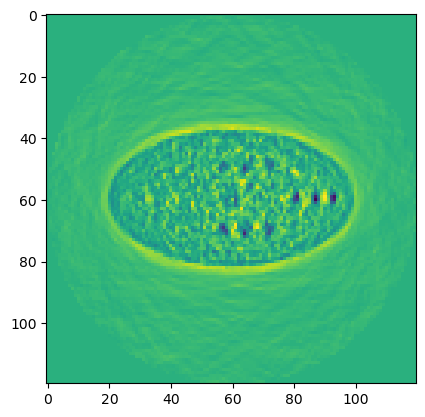

In [80]:
plt.imshow(tGrad/(myR.myPrecTomo+1e-10))

In [82]:
sDir = (-tGrad)/(myR.myPrecTomo+1e-10)

In [96]:
ssV = np.linspace(0,.3,100)
dotPV = np.zeros((100,3))
ll = np.zeros((100,2))
cGrad = np.zeros((100,2))

fpsd = myR.noiseL*myR.sinA*myR.fwdP__(sDir)
sNum = np.dot((-tGrad).flat,sDir.flat)
sDen = np.dot(np.pi/(myR.nTheta*2)*fpsd.flatten(),((fpsd/fp).flat)) 
sDen2 = np.dot(np.pi/(myR.nTheta*2)*(fpsd*myR.sinM/fp).flatten(),((fpsd/fp).flat)) 

for idx,ss in enumerate(ssV):
    tI = inImm+ss*sDir
    tI[tI<0]=0
    fpL = myR.noiseL*(myR.sinA*myR.fwdP__(tI)+myR.randV)
    tGradL = myR.noiseL*myR.bkwP__(myR.sinA*((fpL-myR.sinM)/fpL))
    pGrad = myR.rdp_grad(tI,.01,3e-3)
    dotPV[idx,0] = np.dot(pGrad.flat,sDir.flat)
    dotPV[idx,1] = np.dot(tGradL.flat,sDir.flat)
    dotPV[idx,2] = np.dot((pGrad+tGradL).flat,sDir.flat)
    ll[idx,0] = np.sum(-fpL+myR.sinM*np.log(fpL))
    fpT = fp.copy()+ss*fpsd
    fpT[fpT<(myR.noiseL*myR.randV)] = myR.noiseL*myR.randV
    ll[idx,1] = np.sum(-fpT+myR.sinM*np.log(fpT))
    fpCS = (fp+ss*fpsd)
    negM = fpCS>(myR.randV*myR.noiseL)
    fpCS[~negM]=myR.randV*myR.noiseL
    cGrad[idx,0] = np.dot(fpsd.flat,(((myR.sinM-fpCS)/fpCS)*negM).flat)
    cGrad[idx,1] = np.dot(fpsd.flat,((myR.sinM-fpL)/fpL).flat)
    
    

In [74]:
sNum/sDen,sNum/sDen2,ssV[g0Idx],ssV[np.abs(np.diff(ll[:,0])).argmin()]

NameError: name 'g0Idx' is not defined

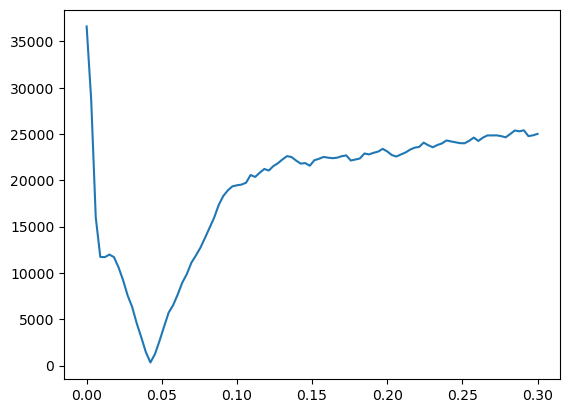

In [117]:
plt.plot(ssV,np.abs(cGrad))

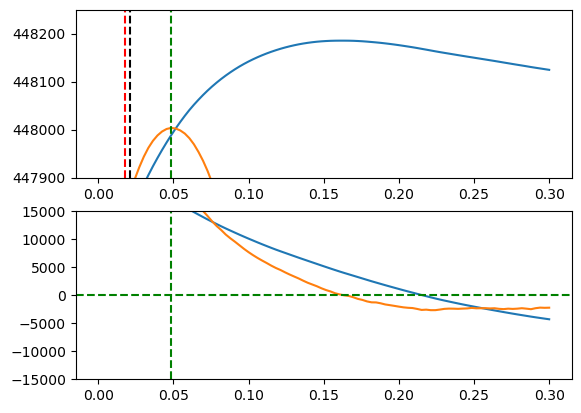

In [119]:
g0Idx = np.abs(cGrad[:,0]).argmin()
plt.subplot(211)
plt.plot(ssV,ll)
plt.axvline(sNum/sDen,ls='--',c='r')
plt.axvline(sNum/sDen2,ls='--',c='k')
plt.axvline(ssV[g0Idx],ls='--',c='g')
plt.ylim(447900,448250)
plt.subplot(212)
plt.plot(ssV,cGrad[:,1])
plt.plot(ssV[1:],8*np.diff(ll[:,0]*2*myR.nTheta/3.14,axis=0))
plt.ylim(-15000,15000)
plt.axvline(ssV[g0Idx],ls='--',c='g')
plt.axhline(0,ls='--',c='g')

In [20]:
myR.MLEM_init()
myR.makeKappa()
myR.makePrec(Expectation=True)
myR.PGDloop(beta=1e-2,nIt=50,recVect=True)
rExp = myR.recVect

NameError: name 'myR' is not defined

In [33]:
myR.MLEM_init()
myR.makeKappa()
myR.makePrec(Expectation=True,fpOne=True)
myR.PGDloop(beta=1e-2,nIt=40,recVect=True)
rExpFP1 = myR.recVect

num: 5.40e-01 denT: 2.79e-01 denP: 2.28e-02	initialSS = 1.79e+00


final ss: 1.79e+00
num: 6.72e-01 denT: 5.50e-01 denP: 7.93e-02	initialSS = 1.07e+00


final ss: 1.07e+00
num: 7.00e-01 denT: 5.50e-01 denP: 1.09e-01	initialSS = 1.06e+00


final ss: 1.06e+00
num: 7.23e-01 denT: 5.43e-01 denP: 1.24e-01	initialSS = 1.08e+00


final ss: 1.08e+00
num: 7.57e-01 denT: 5.70e-01 denP: 1.32e-01	initialSS = 1.08e+00


final ss: 1.08e+00
num: 7.88e-01 denT: 6.10e-01 denP: 1.35e-01	initialSS = 1.06e+00


final ss: 1.06e+00
num: 8.09e-01 denT: 6.43e-01 denP: 1.34e-01	initialSS = 1.04e+00


final ss: 1.04e+00
num: 8.17e-01 denT: 6.62e-01 denP: 1.33e-01	initialSS = 1.03e+00


final ss: 1.03e+00
num: 8.19e-01 denT: 6.71e-01 denP: 1.32e-01	initialSS = 1.02e+00


final ss: 1.02e+00
num: 8.19e-01 denT: 6.74e-01 denP: 1.33e-01	initialSS = 1.02e+00


final ss: 1.02e+00
num: 8.20e-01 denT: 6.76e-01 denP: 1.34e-01	initialSS = 1.01e+00


final ss: 1.01e+00
num: 8.22e-01 denT: 6.79e-01 denP: 1.34e-01	initialSS 

In [35]:
myR.MLEM_init()
myR.makeKappa()
myR.makePrec(Expectation=False)
myR.PGDloop(beta=1e-2,nIt=40,recVect=True)
rNoExp = myR.recVect

num: 5.97e+01 denT: 3.34e+03 denP: 3.03e+02	initialSS = 1.64e-02


final ss: 1.64e-02
num: 7.52e+01 denT: 6.73e+03 denP: 1.04e+03	initialSS = 9.67e-03


final ss: 9.67e-03
num: 7.80e+01 denT: 6.72e+03 denP: 1.41e+03	initialSS = 9.59e-03


final ss: 9.59e-03
num: 8.02e+01 denT: 6.61e+03 denP: 1.59e+03	initialSS = 9.79e-03


final ss: 9.79e-03
num: 8.35e+01 denT: 6.88e+03 denP: 1.69e+03	initialSS = 9.75e-03


final ss: 9.75e-03
num: 8.67e+01 denT: 7.31e+03 denP: 1.73e+03	initialSS = 9.60e-03


final ss: 9.60e-03
num: 8.89e+01 denT: 7.69e+03 denP: 1.73e+03	initialSS = 9.44e-03


final ss: 9.44e-03
num: 8.99e+01 denT: 7.92e+03 denP: 1.71e+03	initialSS = 9.33e-03


final ss: 9.33e-03
num: 9.02e+01 denT: 8.03e+03 denP: 1.71e+03	initialSS = 9.26e-03


final ss: 9.26e-03
num: 9.03e+01 denT: 8.09e+03 denP: 1.71e+03	initialSS = 9.22e-03


final ss: 9.22e-03
num: 9.05e+01 denT: 8.12e+03 denP: 1.72e+03	initialSS = 9.20e-03


final ss: 9.20e-03
num: 9.07e+01 denT: 8.16e+03 denP: 1.73e+03	initialSS 

In [41]:
iRef = rNoExp[:,:,-1]

In [56]:
myR.MLEM_init()
myR.makeKappa()
myR.makePrec(Expectation=False)
myR.PGDloop(beta=1e-2,nIt=400,recVect=True,inSmSigma=1)
rNoExp_sm2 = myR.recVect

num: 1.68e+02 denT: 7.96e+03 denP: 5.06e+02	initialSS = 1.99e-02


final ss: 1.99e-02
num: 1.33e+02 denT: 8.94e+03 denP: 1.09e+03	initialSS = 1.33e-02


final ss: 1.33e-02
num: 1.23e+02 denT: 8.18e+03 denP: 1.51e+03	initialSS = 1.27e-02


final ss: 1.27e-02
num: 1.11e+02 denT: 7.19e+03 denP: 1.58e+03	initialSS = 1.26e-02


final ss: 1.26e-02
num: 1.05e+02 denT: 7.19e+03 denP: 1.65e+03	initialSS = 1.19e-02


final ss: 1.19e-02
num: 1.04e+02 denT: 7.58e+03 denP: 1.67e+03	initialSS = 1.12e-02


final ss: 1.12e-02
num: 1.02e+02 denT: 7.85e+03 denP: 1.67e+03	initialSS = 1.07e-02


final ss: 1.07e-02
num: 1.00e+02 denT: 7.97e+03 denP: 1.66e+03	initialSS = 1.04e-02


final ss: 1.04e-02
num: 9.83e+01 denT: 7.99e+03 denP: 1.67e+03	initialSS = 1.02e-02


final ss: 1.02e-02
num: 9.72e+01 denT: 8.02e+03 denP: 1.68e+03	initialSS = 1.00e-02


final ss: 1.00e-02
num: 9.63e+01 denT: 8.04e+03 denP: 1.70e+03	initialSS = 9.89e-03


final ss: 9.89e-03
num: 9.60e+01 denT: 8.10e+03 denP: 1.71e+03	initialSS 

In [31]:
#np.save('iRef.npy',iRef)
#iRef = np.load('iRef.npy')

In [129]:
myR.MLEM_init()
myR.makeKappa()
myR.makePrec(Expectation=True)
myR.PGDloop(beta=1e-2,nIt=40,recVect=True,Conj=True,PL=True)
rExp_conjPR = myR.recVect.copy()

num: 5.37e+01 denT: 2.79e+03 denP: 2.15e+02	initialSS = 1.79e-02


final ss: 1.79e-02
num: 3.67e+01 denT: 1.35e+03 denP: 2.98e+02	initialSS = 2.23e-02


final ss: 2.23e-02
num: 3.81e+01 denT: 1.48e+03 denP: 3.09e+02	initialSS = 2.13e-02


final ss: 2.13e-02
num: 3.82e+01 denT: 1.49e+03 denP: 3.05e+02	initialSS = 2.13e-02


final ss: 2.13e-02
num: 3.89e+01 denT: 1.55e+03 denP: 3.13e+02	initialSS = 2.09e-02


final ss: 2.09e-02
num: 3.91e+01 denT: 1.56e+03 denP: 3.13e+02	initialSS = 2.08e-02


final ss: 2.08e-02
num: 3.96e+01 denT: 1.60e+03 denP: 3.18e+02	initialSS = 2.06e-02


final ss: 2.06e-02
num: 3.97e+01 denT: 1.61e+03 denP: 3.18e+02	initialSS = 2.06e-02


final ss: 2.06e-02
num: 4.01e+01 denT: 1.64e+03 denP: 3.22e+02	initialSS = 2.04e-02


final ss: 2.04e-02
num: 4.02e+01 denT: 1.65e+03 denP: 3.21e+02	initialSS = 2.04e-02


final ss: 2.04e-02
num: 4.05e+01 denT: 1.67e+03 denP: 3.25e+02	initialSS = 2.03e-02


final ss: 2.03e-02
num: 4.06e+01 denT: 1.68e+03 denP: 3.25e+02	initialSS 

In [133]:
myR.MLEM_init()
myR.makeKappa()
myR.makePrec(Expectation=True)
myR.PGDloop(beta=1e-2,nIt=40,recVect=True,Conj=True,PL=False)
rExp_conjQua = myR.recVect.copy()

num: 5.37e+01 denT: 2.79e+03 denP: 2.15e+02	initialSS = 1.79e-02


final ss: 1.79e-02
num: 6.61e+01 denT: 5.38e+03 denP: 7.58e+02	initialSS = 1.08e-02


final ss: 1.08e-02
num: 6.92e+01 denT: 5.40e+03 denP: 1.06e+03	initialSS = 1.07e-02


final ss: 1.07e-02
num: 7.18e+01 denT: 5.36e+03 denP: 1.21e+03	initialSS = 1.09e-02


final ss: 1.09e-02
num: 7.53e+01 denT: 5.67e+03 denP: 1.29e+03	initialSS = 1.08e-02


final ss: 1.08e-02
num: 7.85e+01 denT: 6.09e+03 denP: 1.31e+03	initialSS = 1.06e-02


final ss: 1.06e-02
num: 8.03e+01 denT: 6.42e+03 denP: 1.30e+03	initialSS = 1.04e-02


final ss: 1.04e-02
num: 8.10e+01 denT: 6.59e+03 denP: 1.29e+03	initialSS = 1.03e-02


final ss: 1.03e-02
num: 8.11e+01 denT: 6.66e+03 denP: 1.28e+03	initialSS = 1.02e-02


final ss: 1.02e-02
num: 8.11e+01 denT: 6.68e+03 denP: 1.29e+03	initialSS = 1.02e-02


final ss: 1.02e-02
num: 8.12e+01 denT: 6.71e+03 denP: 1.30e+03	initialSS = 1.01e-02


final ss: 1.01e-02
num: 8.15e+01 denT: 6.75e+03 denP: 1.31e+03	initialSS 

In [138]:
myR.MLEM_init()
myR.makeKappa()
myR.makePrec(Expectation=True)
myR.PGDloop(beta=1e-2,nIt=40,recVect=True,Conj=False,PL=False)
rExp_nC = myR.recVect.copy()

num: 5.37e+01 denT: 2.79e+03 denP: 2.15e+02	initialSS = 1.79e-02


final ss: 1.79e-02
num: 3.67e+01 denT: 1.35e+03 denP: 2.98e+02	initialSS = 2.23e-02


final ss: 2.23e-02
num: 3.76e+01 denT: 1.44e+03 denP: 3.01e+02	initialSS = 2.16e-02


final ss: 2.16e-02
num: 3.82e+01 denT: 1.49e+03 denP: 3.05e+02	initialSS = 2.13e-02


final ss: 2.13e-02
num: 3.87e+01 denT: 1.53e+03 denP: 3.09e+02	initialSS = 2.10e-02


final ss: 2.10e-02
num: 3.91e+01 denT: 1.56e+03 denP: 3.13e+02	initialSS = 2.08e-02


final ss: 2.08e-02
num: 3.94e+01 denT: 1.59e+03 denP: 3.15e+02	initialSS = 2.07e-02


final ss: 2.07e-02
num: 3.97e+01 denT: 1.61e+03 denP: 3.18e+02	initialSS = 2.06e-02


final ss: 2.06e-02
num: 3.99e+01 denT: 1.63e+03 denP: 3.20e+02	initialSS = 2.05e-02


final ss: 2.05e-02
num: 4.02e+01 denT: 1.65e+03 denP: 3.21e+02	initialSS = 2.04e-02


final ss: 2.04e-02
num: 4.04e+01 denT: 1.66e+03 denP: 3.23e+02	initialSS = 2.03e-02


final ss: 2.03e-02
num: 4.06e+01 denT: 1.68e+03 denP: 3.25e+02	initialSS 

In [29]:
# plt.plot(np.sum(np.sum((rExp-np.expand_dims(iRef,axis=-1))**2,axis=0),axis=0))
# plt.plot(np.sum(np.sum((rExpFP1-np.expand_dims(iRef,axis=-1))**2,axis=0),axis=0))
# plt.plot(np.sum(np.sum((rNoExp-np.expand_dims(iRef,axis=-1))**2,axis=0),axis=0))

plt.plot(np.sum(np.sum((rExp_conjPR-np.expand_dims(iRef,axis=-1))**2,axis=0),axis=0))
plt.plot(np.sum(np.sum((rExp_conjQua-np.expand_dims(iRef,axis=-1))**2,axis=0),axis=0))
plt.xlim(0,10)
plt.ylim(35,50)
#plt.plot(np.sum(np.sum((rExp_nC-np.expand_dims(iRef,axis=-1))**2,axis=0),axis=0))


plt.legend(['Exp','Exp_fp1','noExp','Conj PR','Conj Quad','No Conj'])
# plt.plot(np.sum(np.sum((rNoExp_sm-np.expand_dims(iRef,axis=-1))**2,axis=0),axis=0))
# plt.plot(np.sum(np.sum((rNoExp_sm2-np.expand_dims(iRef,axis=-1))**2,axis=0),axis=0))
plt.yscale('log')

#plt.yscale('log')
#plt.xlim(0,50)
#plt.ylim(1300,2000)
#plt.plot(np.sum(np.sum((rExpFP1-np.expand_dims(iRef,axis=-1))**2,axis=0),axis=0))
#plt.plot(np.sum(np.sum((rExpP-np.expand_dims(iRef,axis=-1))**2,axis=0),axis=0))

NameError: name 'rExp_conjPR' is not defined

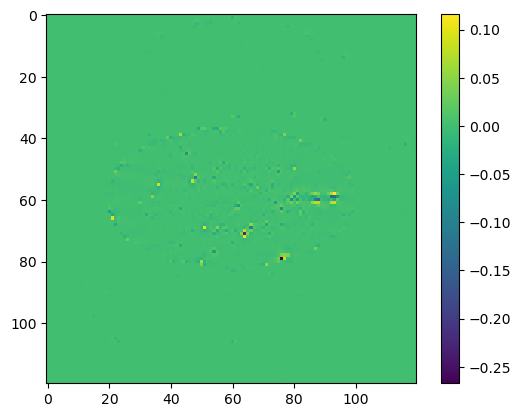

In [60]:
plt.imshow(myR.currRec-iRef)
plt.colorbar()

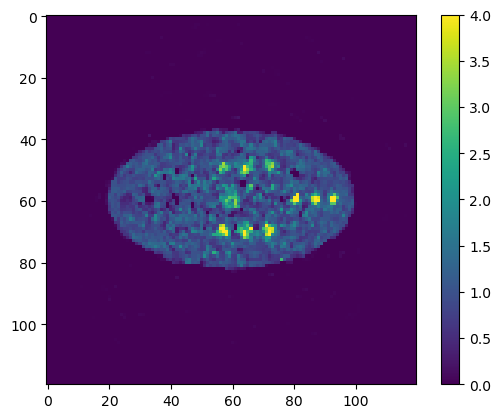

In [62]:
plt.imshow(myR.currRec,vmax=4)
plt.colorbar()


In [75]:
sin = myR.noiseL*(myR.randV+myR.sinA*radon(myR.currRec,theta=myR.thetaV))

In [51]:
plt.imshow((sin)[90:100,170:180])
plt.colorbar()

NameError: name 'sin' is not defined

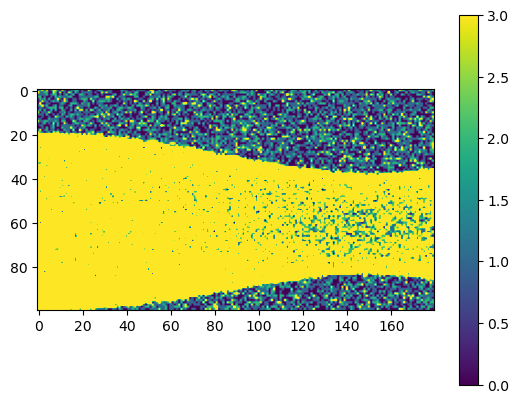

In [61]:
plt.imshow((myR.sinM)[:100,:180],vmin=0,vmax=3)
plt.colorbar()

In [ ]:
betaV = [1e-3,1e-2,3e-2,1e-1,3e-1]#[1,2,4] #,16,32]
iN2P = np.zeros((120,120,len(betaV)))
for nIdx,beta in enumerate(betaV):
    print(f'beta Level is {beta:.2f}')
    myR = myReconstructor(i0,sinA,1,1,nTheta=300)
    myR.MLEM_init()
    myR.PGDloop(beta=beta,nIt=300,Neg=False)
    iN2P[:,:,nIdx]= myR.currRec.copy()

In [ ]:
plt.plot(myR.sinM[:,90])


In [ ]:
#myR.MLEM_init()
#myR.PGDloop(beta=5e-2,nIt=100)
plt.imshow(myR.currRec,vmin=0,vmax=4)

In [ ]:
myR = myReconstructor(i0,sinA,16,10)
myR.MLEM_init()
myR.PGDloop(beta=2.0e-3,nIt=10000,Conj=False)
np.save('Neg_10kitPlain',myR.currRec)

In [ ]:
myR = myReconstructor(i0,sinA,16,10)
myR.MLEM_init()
myR.PGDloop(beta=2.0e-2,nIt=100,Conj=True,Neg=False)
myR.PGDloop(beta=2.0e-2,nIt=200,Conj=True,Neg=False)
myR.PGDloop(beta=2.0e-2,nIt=10000,Conj=False,Neg=False)
np.save('Pos_10kitPlainOk',myR.currRec)

In [ ]:
iNeg = np.load('Neg_10kitPlain.npy')

In [ ]:
b = np.load('Pos_10kitPlain.npy')

In [ ]:
for i in range(5):
    plt.figure()
    plt.imshow(iN2P[:,:,i],vmin=0,vmax=4)
    plt.axis('off')
    plt.colorbar()

In [ ]:
for i in range(5):
    plt.figure()
    plt.imshow(iN2[:,:,i],vmin=0,vmax=4)
    plt.axis('off')
    plt.colorbar()

In [ ]:
for i in range(5):
    plt.figure()
    plt.imshow(iN[:,:,i],vmin=0,vmax=2)
    plt.axis('off')
    plt.colorbar()

In [ ]:
plt.imshow(myR.currRec,vmax=1)
plt.colorbar()

# Test likelihood concavity

C:\Users\User\AppData\Local\Temp\ipykernel_37720\1866582813.py:3: RuntimeWarning: invalid value encountered in log
  ll = ybar - y*np.log(ybar)


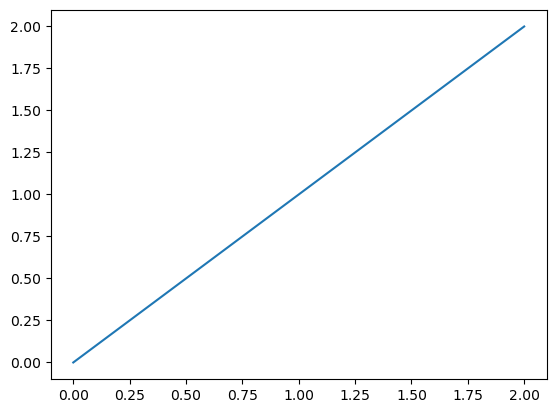

In [100]:
y = 0
ybar = np.arange(-1,2,0.000001)
ll = ybar - y*np.log(ybar)
plt.plot(ybar,ll)

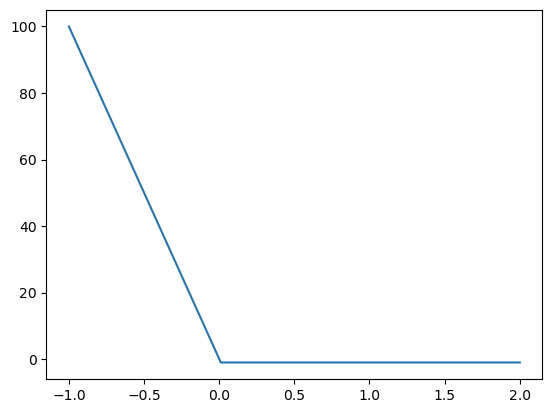

In [104]:
plt.plot(ybar,(0-ybar)/np.maximum(ybar,0.01))
#plt.xscale('log')

### Measured (noisy) sinogram

In [ ]:
noiseL = 16
sinM = sinT.copy()+randV
sinM = np.random.poisson(noiseL*sinM)

## MLEM

In [ ]:
iRec = np.ones_like(i0)*recMask
for itIdx in range(50):
    fwdP = noiseL*(sinA*radon(iRec)+randV)
    sinRat = sinA*(sinM/fwdP)
    iBP = iradon(sinRat,filter_name=None)
    iRec *= (iBP/(iSens+1e-5))

In [ ]:
plt.imshow(iRec)
plt.colorbar()

In [ ]:
plt.plot(fwdP[:,0])
plt.ylim(0,800)

In [ ]:
plt.imshow(ndi.gaussian_filter(iRec,.3),vmax=3)
#plt.xlim(5,205)
#plt.ylim(0,180)
plt.colorbar()

# PGD

### Prec

In [ ]:
fwdP = noiseL*(sinA*radon (iRec)+randV)
myPrecTomo = iradon(sinA**2/(fwdP),filter_name=None)
kappa =iradon(sinA,filter_name=None)

In [ ]:
plt.imshow(myPrecTomo)

### Prior


In [ ]:
# The original one from synerbi
def rdp_grad_or (inpImm_,eps_,beta_,kappa_):
    rdpG_ = np.zeros_like(inpImm_)
    for xs in range(-1,2):
        for ys in range (-1,2):
                if (xs == 0) and (ys==0): 
          #          print('continuing')
                    continue
                shiftImm_ = np.roll(inpImm_,(xs,ys),axis=(0,1))
                sk_ = np.roll(kappa_,(xs,ys),axis=(0,1))

                tempW = kappa_*sk_ / np.sqrt(xs**2+ys**2)   

                rdpG_ += (tempW*(inpImm_ - shiftImm_)*(inpImm_ + 3 * shiftImm_ + 2* eps_ + 2* np.abs(inpImm_-shiftImm_)) \
                /((inpImm_+ shiftImm_) + 2*np.abs(inpImm_-shiftImm_ )+eps_)** 2 )
    rdpG_ *= beta_
    return rdpG_
    

In [ ]:
# my new "continuized" one
def rdp_grad (inpImm_,eps_,beta_,kappa_):
    rdpG_ = np.zeros_like(inpImm_)
    for xs in range(-1,2):
        for ys in range (-1,2):
                if (xs == 0) and (ys==0): 
          #          print('continuing')
                    continue
                shiftImm_ = np.roll(inpImm_,(xs,ys),axis=(0,1))
                sk_ = np.roll(kappa_,(xs,ys),axis=(0,1))

                tempW = kappa_*sk_ / np.sqrt(xs**2+ys**2)   
                rdpG_ += tempW*(inpImm_ - shiftImm_)*(2*eps_**2 + 6* shiftImm_**2 -7*shiftImm_*inpImm_ + 5*inpImm_**2) \
                /(5*shiftImm_**2 -8*shiftImm_*inpImm_+5*inpImm_**2 +eps_**2 )**(3/2)

    rdpG_ *= beta_
    return rdpG_

In [ ]:
def newPriorVal (inpImm_,eps_,beta_,kappa_):
    pV = 0
    for xs in range(-1,2):
        for ys in range (-1,2):
            if (xs == 0) and (ys==0): 
          #          print('continuing')
                    continue
            shiftImm_ = np.roll(inpImm_,(xs,ys),axis=(0,1))
            sk_ = np.roll(kappa_,(xs,ys),axis=(0,1))
            tempW = kappa_*sk_ / np.sqrt(xs**2+ys**2)   
            priorI = tempW*(inpImm_ - shiftImm_)**2 \
                /np.sqrt(eps**2 + inpImm_**2 + shiftImm_**2 + 4*(inpImm_-shiftImm_)**2 )
            pV += np.sum(np.sum(beta_*priorI,axis=-1),axis=-1)
    return pV

In [ ]:
def rdp_den_exact (inpImm_,sDir_,eps_,beta_,kappa_,alpha_=0):

    ssDen = 0
    inpImm_ +=alpha_*sDir_
    for xs in range(-1,2):
        for ys in range (-1,2):
                if (xs == 0) and (ys==0): 
                    continue
                eDist = 1/ np.sqrt(xs**2+ys**2)
                shiftImm_ = np.roll(inpImm_,(xs,ys),axis=(0,1))                         
                sk_ = np.roll(kappa_,(xs,ys),axis=(0,1))
                shiftSI_ = np.roll(sDir_,(xs,ys),axis=(0,1))                
                posM = (inpImm_ + shiftImm_)>(0.01*eps)
                tW = (kappa_*sk_)
                wI = 1/((inpImm_)+ (shiftImm_) + 2 * np.abs(inpImm_-shiftImm_) + eps_)**3
                wI *= tW
                num = wI*((2*shiftImm_+eps_)**2 *  sDir_**2 -(2*inpImm_+eps_)*(2*shiftImm_+eps_)*sDir_*shiftSI_)*posM
                num += 2*(1-posM)*tW*(sDir_**2 - sDir_ * shiftSI_)

                ssDen += np.sum(np.sum(num,axis=-1),axis=-1)
    ssDen *= (2*beta_)
    return ssDen       


In [ ]:
def rdp_den_2 (inpImm_,sDir_,eps_,beta_,kappa_,alpha_=0):

    ssDen = 0
    inpImm_ +=alpha_*sDir_
    for xs in range(-1,2):
        for ys in range (-1,2):
                if (xs==0) and (ys==0):
                    continue
                eDist = 1/ np.sqrt(xs**2+ys**2)
                shiftImm_ = np.roll(inpImm_,(xs,ys),axis=(0,1))                         
                sk_ = np.roll(kappa_,(xs,ys),axis=(0,1))
                shiftSI_ = np.roll(sDir_,(xs,ys),axis=(0,1))                
                tW = (kappa_*sk_)*eDist
                wI = tW/(5*inpImm_**2+5*shiftImm_**2-8*inpImm_*shiftImm_+eps**2)**(5/2)
            
                diagT = sDir_**2 * ( 2*eps**4-eps**2*(5*inpImm_**2-14*inpImm_*shiftImm_+shiftImm_**2)+shiftImm_**2*(22*inpImm_*shiftImm_-7*inpImm_**2-7*shiftImm_**2))
                offDiagT = sDir_*shiftSI_ * ( -2*eps**4+2*eps**2*(inpImm_**2-6*inpImm_*shiftImm_+shiftImm_**2)-shiftImm_*inpImm_*(22*inpImm_*shiftImm_-7*inpImm_**2-7*shiftImm_**2))
                wI *= (diagT+offDiagT)
                ssDen += np.sum(np.sum(wI,axis=-1),axis=-1)
    ssDen *= (beta_)
    return ssDen       

### Restart std code

In [ ]:
def rdp_hess_diag (inpImm_,eps_,beta_,kappa_,alpha_=0):

 #   inpImm_ = ndi.gaussian_filter(inpImm_,1.3)
#    kappa_ = ndi.gaussian_filter(kappa_,1.1)
    #kappa_ = self.kappaArr
    rdpG_ = np.zeros_like(inpImm_)

    for xs in range(-1,2):
        for ys in range (-1,2):
                if (xs == 0) and (ys==0): 
                    continue
                shiftImm_ = np.roll(inpImm_,(xs,ys),axis=(0,1))
                sk_ = np.roll(kappa_,(xs,ys),axis=(0,1))
                
                rdpG_ += 2*(kappa_*sk_)*(eps_ +2 * shiftImm_)**2 /(inpImm_+ shiftImm_ + 2*np.abs(inpImm_-shiftImm_ )+eps_)** 3 

    rdpG_ *= beta_
    rdpG_ = ndi.gaussian_filter(rdpG_,0.6)
    return rdpG_

## Loop

In [ ]:
eps = .01
beta = 3e-3
mask = myPrecTomo>0
#myPrec = myPrecTomo+myPrecR
myPrec = myPrecTomo.copy()
#i0 = np.zeros_like(iRec)
i0 = ndi.gaussian_filter(iRec.copy(),2.2)

fwdProj = noiseL*(radon(i0)*sinA +randV)

nIt = 3000
itVC = np.zeros(iRec.shape+(nIt+1,))
itVC[:,:,0]=i0.copy()
for i in range(nIt):

    bpS = (sinM-fwdProj)/fwdProj #np.maximum(fwdProj,0.01*randV)
    grad = iradon(sinA*bpS,filter_name=None)
    grad -= rdp_grad(i0,eps,beta,kappa)
    sDir = grad/(np.sqrt(myPrec+1e-10))
    # if (i>0):
    #     sDir = np.fft.fft2(sDir,s=(256,256))
    #     sDir *= filt
    #     sDir = np.real(np.fft.ifft2(sDir))
    #     sDir = sDir[:i0.shape[0],:i0.shape[1]]
    sDir *=(mask/np.sqrt(myPrec+1e-10))
 
    if (i>0):
        betaCG = np.dot(grad.flat,(sDir-sDirP).flat)/np.dot(sDirP.flat,gradP.flat)   
        beta0 = np.dot(grad.flat,sDir.flat)/np.dot(sDirP.flat,gradP.flat)
        betaCG = max(betaCG,0)
#        print(f'betaPR = {betaCG:.2f} betaT = {beta0:.2f}',end='\t')
 #       if ((i==10) or ((i%100)==0)):
  #           betaCG=0
        sDir += (betaCG*sDirP)

    fpsd = noiseL*sinA*radon(sDir)
    sNum = np.dot(grad.flat,sDir.flat)
    sDen = np.dot(np.pi/(180*2)*fpsd.flatten(),((fpsd/fwdProj).flat)) #np.maximum(fwdProj,.1*randV)).flat)) 
   # print(f'sDen{sDen:.2e}',end='   ')
   # if (i>0):
    sDen += rdp_den_2(i0,sDir,eps,beta,kappa)
  #  print(f'sDen{sDen:.2e}',end='\t')
    ss = sNum/sDen

    fwdProj += (ss*fpsd)
    sDirP = sDir.copy()
    gradP = grad.copy()
    i0+= ss*sDir
    i0[i0<0]=0
    fwdProj = noiseL*(radon (i0)*sinA + randV)
    itVC[:,:,i+1] = i0

In [ ]:
#iNegEps5=i0.copy()
#iNegEps05=i0.copy()
iNegEps01=i0.copy()

In [ ]:
plt.imshow(iNegEps01,vmax=.3,vmin=0)

In [ ]:
plt.imshow(sDir)

In [ ]:
plt.plot(i0[120,:])
plt.plot(iNegEps01[120,:])
plt.xlim(150,190)

In [ ]:
plt.imshow(i0-iNegEps01,vmax=.1,vmin=-.1)
plt.colorbar()

In [ ]:
#ie4 = i0.copy()
#ie3 = i0.copy()
#ie2 = i0.copy()
ie1 = i0.copy()

In [ ]:
iNeg = i0.copy()

In [ ]:
#_=plt.plot(itVC[120,34:55,:10:])
_=plt.plot(ie4[120,100:200])
_=plt.plot(ie3[120,100:200])
_=plt.plot(ie2[120,100:200])
_=plt.plot(ie1[120,100:200])

In [ ]:
plt.figure(figsize=(7,7))
plt.imshow((i0-itNeg)[35:-35,35:-35],vmin=-.1,vmax=3)
plt.axis('off')
plt.colorbar()

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(i0[35:-35,35:-35],vmax=1.3,vmin=0)
plt.subplot(122)
plt.imshow(itNeg[35:-35,35:-35],vmax=1.3,vmin=0)
#plt.colorbar()

In [ ]:
plt.imshow(sinM,vmax=3) #,vfwdmax=.1,vmin=-.1)
plt.colorbar()

In [ ]:
ssV = np.linspace(-0.25,0.2,100)
pVV = np.zeros((100,))
for idx in range(100):
    pVV[idx] = newPriorVal(iP+ssV[idx]*sDir,eps,beta,kappa)

In [ ]:
plt.plot(ssV,pVV)
plt.plot(ssV,44.3+1.*(ssV+0.021)**2*203)
#plt.xlim(0.009,0.016)
#plt.ylim(243,270)

In [ ]:
plt.imshow(ss*sDir)

plt.colorbar()

In [ ]:
plt.figure()

plt.imshow(fwdProj)
plt.colorbar()

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(ss*sDir) #,vmax=4) #,vmin=-1)
#plt.xlim(20,215)
#plt.ylim(60,180)
plt.colorbar()

In [ ]:
plt.imshow(itVC[:,:,-1]-itVC[:,:,0]) #,vmax=.1,vmin=-.1)
plt.colorbar()

In [ ]:
iRp = np.expand_dims(itVN[:,:,-1],axis=-1)
#iR = np.expand_dims(i,axis=-1)
dvS = np.sum(np.sum((itVN-iRp)**2,axis=1),axis=0)
dvL = np.sum(np.sum((itVC-iRp)**2,axis=1),axis=0)

#plt.plot(dv)
plt.plot(dvS[:500])
plt.plot(dvL)
plt.xlim(0,500)
plt.yscale('log')

In [ ]:
plt.imshow((1/(myPrecTomo+.001)))
plt.colorbar()

# New Prior tests

In [ ]:
xv = -.2
eps = 0.0
yv = np.linspace(-6,6,2000)
f1 = 1.44*(xv-yv)**2/(xv+yv+2*np.abs(xv-yv)+eps)
f2 = (xv-yv)**2/(np.sqrt((xv)**2+(yv)**2+4*(xv-yv)**2+eps**2))
#plt.plot(yv[1:],np.diff(f1))
# plt.plot(yv[1:],np.diff(f2))
#plt.plot(yv,1.44*(-12/2000)*(xv-yv)*(yv+3*xv+2*np.abs(xv-yv)+2*eps)/((xv+yv+2*np.abs(xv-yv)+eps)**2))
plt.plot(yv[:],(f1))
plt.plot(yv[:],(f2))
#plt.xscale('log')
plt.ylim(-2,5)

In [ ]:
eps = 0.1
gamma = 2
xv = 0.02
yv = np.linspace(-.05,.05,100)
f1 = (xv-yv)*(xv+2*eps+3*yv+gamma*np.abs(xv-yv))/(xv+eps+yv+gamma*np.abs(xv-yv))**2
f2 = 2*(xv-yv)/(2*eps)
plt.plot(yv,f1)
plt.plot(yv,f2)


# Test grad if cont

In [ ]:
iTest = 0.1*np.ones_like(i0)
#iTest[120,120]=0.004
xtV = np.linspace(-.7,1,200)
outV = np.zeros((200,4))
for idx,tv in enumerate(xtV):
    iTest[120,121] = tv
    grad = rdp_grad(iTest,eps,beta*1,kappa)
    outV[idx,0] = grad[120,121]
    outV[idx,1] = grad[120,120]
    grad = 1.44*rdp_grad_or(iTest,eps,beta*1,kappa)
    outV[idx,2] = grad[120,121]
    outV[idx,3] = grad[120,120]

In [ ]:
plt.plot(xtV,outV)
#plt.xscale('log')
#plt.xlim(-0.3,0.2)

#plt.ylim(-0.07,0.04)

# Previous phantom

In [ ]:
i2 = shepp_logan_phantom()
bM = i2>0.5
inM = np.logical_and(i2<0.5,i2>0.01)
#plt.imshow(bM)
sM = ndi.binary_dilation(bM,iterations=5)
sM = np.logical_and(sM,np.logical_not(bM))
sM = np.logical_and(sM,np.logical_not(inM))
i2[bM] = 0
i2[sM] = 0.05
plt.figure(figsize=(10,10))
plt.imshow(i2[:,:],vmax=.3)
iR = resize(i2,(200,200))
bM = resize(bM,(200,200))
plt.colorbar()

In [ ]:
attM = 0.0096*(iR>0.01)

attM[bM>0.1]= 0.0013

In [ ]:
iPad = np.pad(iR,((20,20),(20,20)))
attM = np.pad(attM,((20,20),(20,20)))
attM = ndi.gaussian_filter(attM,0.7)

In [ ]:
attS = (np.exp(-radon(attM*1.2)))
plt.figure(figsize=(10,10))
plt.imshow(1/attS.T)
plt.colorbar()

In [ ]:
plt.imshow(iPad,vmin=0.18,vmax=.32)
plt.colorbar()

In [ ]:
myR = myReconstructor(iPad,attS,10,.3)
myR.MLEM_init()
myR.PGDloop(beta=.1,nIt=50,Conj=True)
#myR.PGDloop(beta=.1,nIt=300,Conj=True)
#np.save('Neg_10kitPlain',myR.currRec)

In [ ]:
plt.imshow(myR.currRec,vmin=0,vmax=.4)

In [ ]:
plt.plot(myR.sinM[:,90])
#plt.colorbar()

In [ ]:
myR = myReconstructor(iPad,attS,1024,10)
myR.MLEM_init()
myR.PGDloop(beta=.1,nIt=10000,Conj=False)
np.save('SheppLog_Neg_10kitPlain',myR.currRec)

In [ ]:
myR = myReconstructor(iPad,attS,1024,10)
myR.MLEM_init()
myR.PGDloop(beta=.1,nIt=100,Conj=True,Neg=False)
myR.PGDloop(beta=.1,nIt=200,Conj=True,Neg=False)
myR.PGDloop(beta=.1,nIt=10000,Conj=False,Neg=False)
np.save('SheppLog_Pos_10kitPlain',myR.currRec)

In [ ]:
iN = np.load('SheppLog_Neg_10kitPlain.npy')

In [ ]:
plt.imshow(iN,vmin=0,vmax=.4)

In [ ]:
plt.imshow(myR.currRec,vmin=0,vmax=.4)

In [ ]:
#i2 = myR.currRec.copy()
#i1 = myR.currRec.copy()
#i105 = myR.currRec.copy()
i02 = myR.currRec.copy()

In [ ]:
plt.imshow(i02,vmin=-.0,vmax=.4) #,vmin=0,vmax=.4)
#plt.colorbar()

In [ ]:
sinoSc = ndi.gaussian_filter(sino/attS,3.8)
xv = np.arange(-119.5,120.5)
kern = np.expand_dims(np.exp(-np.abs(xv)/6),axis=-1)
sinoSc = ndi.gaussian_filter(sino*attS,2.8)
scTails = ndi.convolve(sinoSc,kern/6)



In [ ]:
plt.imshow(sino)

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(2*sinoSc,vmax=5)
plt.subplot(132)
plt.imshow(sino,vmax=7)
plt.subplot(133)
plt.imshow(scTails/4,vmax=5)
#plt.colorbar()

In [ ]:
sl =125
plt.plot((sino)[sl,:])
plt.plot((sinoSc)[sl,:]*2)
plt.plot((scTails)[sl,:]*2/6)

In [ ]:
sl = 100
plt.plot(sino[:,sl])
plt.plot(sinoSc[:,sl]*1)
plt.plot(scTails[:,sl]*1)
#plt.yscale('log')

# PGD Recon

## Create sino

In [ ]:
randV = .6
sF = 1
scS = (sinoSc+scTails)
scS *=.5
scS *= sF
noise = .0125
#scS /= noise
#randV/= noise
sinoTrue = sino+scS+ randV
sinoMeas = noise*np.random.poisson(sinoTrue/noise)

In [ ]:
plt.imshow(sinoTrue)
plt.colorbar()

In [ ]:
plt.plot(sinoTrue[:,100])
#plt.plot(sinoTrue[:,100]-scS[:,100])
plt.plot(sino[:,100])

# PGD LOOP

## Prec

In [ ]:
iT = iradon((sinoMeas-scS-randV)/attS,filter_name='hann')
fp = attS*radon(iT)
fwdProj = radon(iT)

In [ ]:
myPrecTomo = iradon(attS**2/(fp+scS+randV),filter_name=None)
#myPrecTomo2 = iradon(attS**2/fwdProj,filter_name=None)

In [ ]:
#plt.imshow(myPrecTomo2)
plt.imshow(myPrecTomo)

In [ ]:
plt.plot(myPrecTomo[:,100]) #/myPrecTomo2)[120,:])
#plt.plot(myPrecTomo2[:,140])
plt.yscale('log')

In [ ]:
np.sum(fp)/np.sum(fp+scS+randV)

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(fp+scS+randV) #1/np.sqrt(myPrec)) #(fp+scS+randV))
plt.colorbar()

In [ ]:
plt.imshow(iT)

## Filter

In [ ]:
def makeFFT_2D_filter (imShape_,tRes_=0):
    d_ = .65
    order = np.power(2,np.ceil(np.log2(imShape_[1]))).astype(np.uint32)
    freqN = order//2
    nFreq = np.arange(0,freqN +1)
    filtImpResp = np.zeros((len(nFreq),))
    filtImpResp[0]=1/4
    filtImpResp[1::2]=-1/((np.pi*nFreq[1::2])**2)

    #TOF part
    if (tRes_ > 0):
        xV_ = nFreq*pixS_
        tRes_ = tRes_*0.15/2.35 # 300 mm /ns --> .3 mm/ps --> /2 because 2 photons 
        tKern_ = np.exp(-(xV_**2/(4*tRes_**2)))
        filtImpResp *=tKern_

    # Once the filter has been defined in image space, convert it to Fourier space
    filtImpResp = np.concatenate([filtImpResp,filtImpResp[-2:0:-1]])
    ftFilt = 2 * np.real(np.fft.fft(filtImpResp)) # check! when implemented correctly the imag part is zero within numerical precision
    ftFilt = ftFilt[:(freqN+1)]

    # Apply the shepp-logan window
    fV = 2*np.pi*(np.arange(1,freqN+1))/imShape_[1]
    ftFilt[1:] *= (np.sin(fV/(2*d_)) / (fV/(2*d_)))
    ftFilt[ftFilt<0]=0

    # interpolate to 2D
    xf = np.arange(0,freqN+1).reshape((1,freqN+1))
    yf = xf.transpose()
    freqR = np.sqrt(xf**2+yf**2)
    interpF = np.interp(freqR,nFreq,ftFilt,right=0)
    interpF = np.concatenate([interpF,interpF[-2:0:-1,:]],axis=0)
    interpF = np.concatenate([interpF,interpF[:,-2:0:-1]],axis=1)
    return interpF



In [ ]:
filt = makeFFT_2D_filter(iPad.shape)

In [ ]:
iPad.shape

In [ ]:
i0 = np.zeros_like(iPad)
i0[120,120]=1
i0 = ndi.gaussian_filter(i0,0.4)
impSino= radon(i0)
bpSino = iradon(impSino,filter_name=None)

In [ ]:
plt.plot(bpSino[120,1:])
plt.plot(bpSino[120,-1:0:-1])
# plt.plot(bpSino[1:,120])
# plt.plot(bpSino[-1:0:-1,120])
#plt.yscale('log')

In [ ]:
plt.imshow((0.0+np.abs(np.fft.fft2((bpSino[:,:])))),vmax=20)
#plt.plot(1/np.abs(np.fft.fft2((bpSino[:,:])))[0,:])
#plt.plot(1/np.abs(np.fft.fft2((bpSino[:,:])))[:,0])
plt.colorbar()

In [ ]:
plt.imshow(filt)

## Prior

In [ ]:
kappa =iradon(attS,filter_name=None)
eps = 1e-1
beta = 5e-2
myPrecR = rdp_hess_diag(iT*(iT>0),.1*eps,beta,kappa)

In [ ]:
plt.plot(kappa[128,:])

In [ ]:
plt.plot((myPrecTomo)[128,:])
plt.plot(beta*(myPrecR)[128,:])
#plt.yscale('log')

## Loop

 **TODO**
 1. Conj
 2. Step size
 3. Filt

In [ ]:
iRefNeg = i0.copy()

In [ ]:
#fwdProj = attS*radon(i0)+ scS+randV
plt.figure()
plt.subplot(121)
plt.imshow(sinoMeas) #,vmin=-.4,vmax=.1)
plt.colorbar()
plt.subplot(122)
plt.imshow((fwdProj-sinoMeas)/fwdProj)
plt.colorbar()

In [ ]:
#plt.imshow((itV_in0_PR_precConv[:,:,1]))
plt.imshow(((i0-iRefNeg))[:,:]) #,vmax=0.001)
plt.colorbar()

In [ ]:
plt.imshow(myPrecR,vmax=1.9)

In [ ]:
iRef = i0.copy()

In [ ]:
iRefNeg = i0.copy()

In [ ]:
i0 = itV_CG8[:,:,-2].copy()

In [ ]:
cV = np.sum(np.sum((itV_in0_CDF-np.expand_dims(iRefNeg,axis=-1))**2,axis=1),axis=0)
cV2 = np.sum(np.sum((itV_in0_CDT-np.expand_dims(iRefNeg,axis=-1))**2,axis=1),axis=0)
cV3 = np.sum(np.sum((itV_in0_CFT-np.expand_dims(iRefNeg,axis=-1))**2,axis=1),axis=0)
cV4 = np.sum(np.sum((itV_in0_CFF-np.expand_dims(iRefNeg,axis=-1))**2,axis=1),axis=0)
cV5 = np.sum(np.sum((itV_inF_CFF-np.expand_dims(iRefNeg,axis=-1))**2,axis=1),axis=0)
cV6 = np.sum(np.sum((itV_inF_CDF-np.expand_dims(iRefNeg,axis=-1))**2,axis=1),axis=0)
cV7 = np.sum(np.sum((itV_inF_CDT-np.expand_dims(iRefNeg,axis=-1))**2,axis=1),axis=0)

plt.plot(cV[:])
plt.plot(cV2[:])
plt.plot(cV3[:])
plt.plot(cV4[:])
plt.plot(cV5[:])
plt.plot(cV6[:])
plt.plot(cV7[:])
#plt.plot(cV8[:])
plt.yscale('log')
plt.xscale('log')
plt.legend(['Conj Diag Full','Conj Diag Tomo','Conj Filt Tomo','Conj Filt Full','Conj Filt Full INIT','Conj Diag Full INIT','Conj Diag Tomo Init'])

In [ ]:
plt.imshow(itV_inFBP_PR[:,:,80])
plt.colorbar()

In [ ]:
np.sum((i0-iRef)**2)

In [ ]:
i100 = i0.copy()

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(iRef,vmax=.5,vmin=-.02) #,vmin=0)
plt.subplot(122)
plt.imshow(i0,vmax=.5,vmin=-.02) #,vmin=0)
#plt.colorbar()

In [ ]:
plt.imshow()
plt.colorbar()

In [ ]:
from scipy.linalg import circulant, toeplitz

In [ ]:
T = toeplitz([6, -4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [ ]:
plt.imshow(T)

In [ ]:
plt.imshow((np.imag(np.fft.fft(np.fft.fft(T).conj().T)))[:,:])
#plt.colorbar()